# Atwell - Assignment 2 Code

##Package import, initial setup, and data import

In [67]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
import time
from operator import itemgetter
import os
os.getcwd()

'/Users/Mike/Desktop'

####Change working directory if needed

In [68]:
cd C:\\Users\\mlatw\\Desktop\\BIA6303\\Assignment_2

[Errno 2] No such file or directory: 'C:\\Users\\mlatw\\Desktop\\BIA6303\\Assignment_2'
/Users/Mike/Desktop


### Read in Data
The data is contained in two different files (train and test).

In [69]:
#import train data
pd.options.display.max_rows = 10
df_train = pd.read_csv("adult_train.data", header=None, index_col=False, sep=",", na_values=" ?", names = ['Age','Work_Class','Fnlwgt','Education','Education_num','Marital_status','Occupation','Relationship','Race','Sex','Capital_gain','Capital_loss','Hours_Per_Week','Native_Country','Income_Class'])
df_train

,Age,Work_Class,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_Per_Week,Native_Country,Income_Class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [70]:
#import test data
pd.options.display.max_rows = 10
df_test = pd.read_csv("adult_test", sep=",", na_values=" ?",names = ['Age','Work_Class','Fnlwgt','Education','Education_num','Marital_status','Occupation','Relationship','Race','Sex','Capital_gain','Capital_loss','Hours_Per_Week','Native_Country','Income_Class'])
df_test = df_test.drop(df_test.index[0]) #drops initial row of non-data
df_test

,Age,Work_Class,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_Per_Week,Native_Country,Income_Class
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,NaN,103497.0,Some-college,10.0,Never-married,NaN,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
16278,64,NaN,321403.0,HS-grad,9.0,Widowed,NaN,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.


##Data Munging

First let's look at the data types of the train and test sets to see what we're working with.

In [71]:
pd.options.display.max_rows = 15
print("Training Data Type", df_train.dtypes)
print("Test Data Type", df_test.dtypes)

Training Data Type Age                int64
Work_Class        object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_Per_Week     int64
Native_Country    object
Income_Class      object
dtype: object
Test Data Type Age                object
Work_Class         object
Fnlwgt            float64
Education          object
Education_num     float64
Marital_status     object
Occupation         object
Relationship       object
Race               object
Sex                object
Capital_gain      float64
Capital_loss      float64
Hours_Per_Week    float64
Native_Country     object
Income_Class       object
dtype: object


The 'Age' column in the test set is an object data type, but otherwise all of the columns with numbers are a numeric data type.  Now let's see if there are any null values.

In [72]:
df_train.isnull().sum()

Age                  0
Work_Class        1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_Per_Week       0
Native_Country     583
Income_Class         0
dtype: int64

In [73]:
df_test.isnull().sum()

Age                 0
Work_Class        963
Fnlwgt              0
Education           0
Education_num       0
Marital_status      0
Occupation        966
Relationship        0
Race                0
Sex                 0
Capital_gain        0
Capital_loss        0
Hours_Per_Week      0
Native_Country    274
Income_Class        0
dtype: int64

Three columns in both sets show null values: Work_Class, Occupation, and Native_Country.  Since the datasets are large relative to these values, we'll drop the rows with null values and still have plenty of data to work with.

In [74]:
df_train = df_train.dropna()
print("Train Shape of Data", df_train.shape)

Train Shape of Data (30162, 15)


In [75]:
df_test = df_test.dropna()
print("Test Shape of Data", df_test.shape)

Test Shape of Data (15060, 15)


Now let's look at the non-numeric columns to see what's in them.

####Work Class

In [76]:
print("Train Set", df_train.Work_Class.value_counts())
print("Test Set", df_test.Work_Class.value_counts())

Train Set  Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: Work_Class, dtype: int64
Test Set  Private             11021
 Self-emp-not-inc     1297
 Local-gov            1033
 State-gov             667
 Self-emp-inc          572
 Federal-gov           463
 Without-pay             7
Name: Work_Class, dtype: int64


I don't see any irregularities here.  These will have to be converted to dummy variables.

####Education

In [77]:
pd.options.display.max_rows = 16
print("Train Set", df_train.Education.value_counts())
print("Test Set", df_test.Education.value_counts())

Train Set  HS-grad         9840
 Some-college    6678
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: Education, dtype: int64
Test Set  HS-grad         4943
 Some-college    3221
 Bachelors       2526
 Masters          887
 Assoc-voc        652
 11th             571
 Assoc-acdm       499
 10th             403
 7th-8th          266
 Prof-school      243
 9th              221
 12th             200
 Doctorate        169
 5th-6th          161
 1st-4th           71
 Preschool         27
Name: Education, dtype: int64


I don't see any irregularities here.  The dataset already has a numeric scale from Preschool to Doctorate in the 'Education_num' column, so we can can safely drop the 'Education' column.

In [78]:
df_train = df_train.drop(['Education'],axis=1)
print("Training Set:")
print(df_train.columns) #verify remaining columns
df_test = df_test.drop(['Education'],axis=1)
print("Test Set:")
print(df_test.columns) #verify remaining columns

Training Set:
Index(['Age', 'Work_Class', 'Fnlwgt', 'Education_num', 'Marital_status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain',
       'Capital_loss', 'Hours_Per_Week', 'Native_Country', 'Income_Class'],
      dtype='object')
Test Set:
Index(['Age', 'Work_Class', 'Fnlwgt', 'Education_num', 'Marital_status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain',
       'Capital_loss', 'Hours_Per_Week', 'Native_Country', 'Income_Class'],
      dtype='object')


In [79]:
print("Training Set:")
print(df_train.Marital_status.value_counts())
print("Test Set:")
print(df_test.Marital_status.value_counts())

Training Set:
 Married-civ-spouse       14065
 Never-married             9726
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: Marital_status, dtype: int64
Test Set:
 Married-civ-spouse       6990
 Never-married            4872
 Divorced                 2083
 Separated                 472
 Widowed                   450
 Married-spouse-absent     182
 Married-AF-spouse          11
Name: Marital_status, dtype: int64


I don't see any irregularties to be corrected here.  These will have to be converted to dummy variables.

####Occupation

In [80]:
print("Training Set:")
print(df_train.Occupation.value_counts())
print("Test Set:")
print(df_test.Occupation.value_counts())

Training Set:
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: Occupation, dtype: int64
Test Set:
 Exec-managerial      1992
 Craft-repair         1990
 Prof-specialty       1970
 Sales                1824
 Adm-clerical         1819
 Other-service        1596
 Machine-op-inspct    1004
 Transport-moving      744
 Handlers-cleaners     696
 Tech-support          508
 Farming-fishing       491
 Protective-serv       332
 Priv-house-serv        89
 Armed-Forces            5
Name: Occupation, dtype: int64


I don't see any irregularities to be corrected.  These will have to be converted into dummy variables. 

####Family Relationship

In [81]:
print("Training Set:")
print(df_train.Relationship.value_counts())
print("Test Set:")
print(df_test.Relationship.value_counts()) 

Training Set:
 Husband           12463
 Not-in-family      7726
 Own-child          4466
 Unmarried          3212
 Wife               1406
 Other-relative      889
Name: Relationship, dtype: int64
Test Set:
 Husband           6203
 Not-in-family     3976
 Own-child         2160
 Unmarried         1576
 Wife               685
 Other-relative     460
Name: Relationship, dtype: int64


I don't see any irregularities to be corrected.  These will have to be converted into dummy variables. 

####Race

In [82]:
print("Training Set:")
print(df_train.Race.value_counts())
print("Test Set:")
print(df_test.Race.value_counts())

Training Set:
 White                 25933
 Black                  2817
 Asian-Pac-Islander      895
 Amer-Indian-Eskimo      286
 Other                   231
Name: Race, dtype: int64
Test Set:
 White                 12970
 Black                  1411
 Asian-Pac-Islander      408
 Amer-Indian-Eskimo      149
 Other                   122
Name: Race, dtype: int64


I don't see any irregularities to be corrected.  These will have to be converted into dummy variables. 

####Gender

In [83]:
print("Training Set:")
print(df_train.Sex.value_counts())
print("Test Set:")
print(df_test.Sex.value_counts())

Training Set:
 Male      20380
 Female     9782
Name: Sex, dtype: int64
Test Set:
 Male      10147
 Female     4913
Name: Sex, dtype: int64


I don't see any irregularities to be corrected.  These will have to be converted into dummy variables. 

####Native Country

In [84]:
pd.options.display.max_rows = 41
print("Training Set:")
print(df_train.Native_Country.value_counts())
print("Test Set:")
print(df_test.Native_Country.value_counts())

Training Set:
 United-States                 27504
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 El-Salvador                     100
 India                           100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Haiti                            42
 Taiwan                           42
 Iran                             42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                 

The train data has one value from the Netherlands while the test data has zero, so a column of all zeros for the Netherlands will have to be added to the test dataset.  These will have to be converted into dummy variables. 

####Income Class

In [85]:
print("Training Set:")
print(df_train.Income_Class.value_counts())
print("Test Set:")
print(df_test.Income_Class.value_counts())

Training Set:
 <=50K    22654
 >50K      7508
Name: Income_Class, dtype: int64
Test Set:
 <=50K.    11360
 >50K.      3700
Name: Income_Class, dtype: int64


I don't see any irregularities to be corrected.  As this is the target variable, these will have to be converted to a normalized numeric 1/0. 

###Creating a numeric dataframe

Now we'll create separate dataframes that will be all numeric, and look at and/or convert the data as needed.

In [86]:
df_train_num = df_train
df_test_num = df_test

Now we're going to take a look at the train data that's already numeric.

In [87]:
df_train_num.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_Per_Week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


I don't see any outliers in the numeric train data that need to be deleted.

Now we'll look at the test numeric data, but first we need to convert the 'Age' column to numeric.

In [88]:
df_test_num['Age'] = df_test['Age'].astype(float)  #changes to numeric

In [89]:
df_test_num.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_Per_Week
count,15060.000000,1.506000e+04,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,1.896164e+05,10.112749,1120.301594,89.041899,40.951594
std,13.380676,1.056150e+05,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.166550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.779550e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.385888e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


I don't see any outliers in the numeric test data that need to be deleted.

Now we'll convert the income class to a 1/0 numeric (where 1 is >50K, 0 is <= 50K).

In [90]:
train_class_convert = df_train['Income_Class'].astype(str) #changes to string so we can change on the next line of code
train_class_convert = train_class_convert.str.replace('>50K', '1') 
train_class_convert = train_class_convert.str.replace('<=50K', '0')
df_train_num['Income_Class'] = train_class_convert.astype(int) #changes to numeric

test_class_convert = df_test['Income_Class'].astype(str) #changes to string so we can change on the next line of code
test_class_convert = test_class_convert.str.replace('>50K.', '1') 
test_class_convert = test_class_convert.str.replace('<=50K.', '0')
df_test_num['Income_Class'] = test_class_convert.astype(int) #changes to numeric

Now we'll desginate the target variable and move it to the first column.

In [91]:
targetName = 'Income_Class' # designate target variable name

#training set
targetSeries_train = df_train_num[targetName]
#remove target from current location and insert in column 0
del df_train_num[targetName]
df_train_num.insert(0, targetName, targetSeries_train)

#test set
targetSeries_test = df_test_num[targetName]
#remove target from current location and insert in column 0
del df_test_num[targetName]
df_test_num.insert(0, targetName, targetSeries_test)

Now let's create dummy variables for all of the remaining object columns.

In [92]:
#train set
# perform data transformation. Creates dummies of any categorical feature
for col in df_train_num.columns[1:]:
	attName = col
	dType = df_train_num[col].dtype
	missing = pd.isnull(df_train_num[col]).any()
	uniqueCount = len(df_train_num[attName].value_counts(normalize=False))
	# discretize (create dummies)
	if dType == object:
		df_train_num = pd.concat([df_train_num, pd.get_dummies(df_train_num[col], prefix=col)], axis=1)
		del df_train_num[attName]
print("Train Set:")
df_train_num.head(5)

Train Set:


,Income_Class,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_Per_Week,Work_Class_ Federal-gov,Work_Class_ Local-gov,Work_Class_ Private,...,Native_Country_ Portugal,Native_Country_ Puerto-Rico,Native_Country_ Scotland,Native_Country_ South,Native_Country_ Taiwan,Native_Country_ Thailand,Native_Country_ Trinadad&Tobago,Native_Country_ United-States,Native_Country_ Vietnam,Native_Country_ Yugoslavia
0,0,39,77516,13,2174,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,50,83311,13,0,0,13,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,38,215646,9,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0,53,234721,7,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,28,338409,13,0,0,40,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [93]:
# test set
# perform data transformation. Creates dummies of any categorical feature
for col in df_test_num.columns[1:]:
	attName = col
	dType = df_test_num[col].dtype
	missing = pd.isnull(df_test_num[col]).any()
	uniqueCount = len(df_test_num[attName].value_counts(normalize=False))
	# discretize (create dummies)
	if dType == object:
		df_test_num = pd.concat([df_test_num, pd.get_dummies(df_test_num[col], prefix=col)], axis=1)
		del df_test_num[attName]
print("Test Set:")
df_test_num.head(5)

Test Set:


,Income_Class,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_Per_Week,Work_Class_ Federal-gov,Work_Class_ Local-gov,Work_Class_ Private,...,Native_Country_ Portugal,Native_Country_ Puerto-Rico,Native_Country_ Scotland,Native_Country_ South,Native_Country_ Taiwan,Native_Country_ Thailand,Native_Country_ Trinadad&Tobago,Native_Country_ United-States,Native_Country_ Vietnam,Native_Country_ Yugoslavia
1,0,25.0,226802.0,7.0,0.0,0.0,40.0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0,38.0,89814.0,9.0,0.0,0.0,50.0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,1,28.0,336951.0,12.0,0.0,0.0,40.0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,1,44.0,160323.0,10.0,7688.0,0.0,40.0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6,0,34.0,198693.0,6.0,0.0,0.0,30.0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


Now we'll normalize all columns between zero and one.

In [94]:
#train set
pd.options.display.max_rows = 10
df_train_num = (df_train_num - df_train_num.min())/(df_train_num.max() - df_train_num.min())
print("Training Set:")
df_train_num

Training Set:


,Income_Class,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_Per_Week,Work_Class_ Federal-gov,Work_Class_ Local-gov,Work_Class_ Private,...,Native_Country_ Portugal,Native_Country_ Puerto-Rico,Native_Country_ Scotland,Native_Country_ South,Native_Country_ Taiwan,Native_Country_ Thailand,Native_Country_ Trinadad&Tobago,Native_Country_ United-States,Native_Country_ Vietnam,Native_Country_ Yugoslavia
0,0.0,0.301370,0.043338,0.800000,0.021740,0.0,0.397959,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.452055,0.047277,0.800000,0.000000,0.0,0.122449,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.287671,0.137244,0.533333,0.000000,0.0,0.397959,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.493151,0.150212,0.400000,0.000000,0.0,0.397959,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.150685,0.220703,0.800000,0.000000,0.0,0.397959,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.0,0.136986,0.165563,0.733333,0.000000,0.0,0.377551,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32557,1.0,0.315068,0.095589,0.533333,0.000000,0.0,0.397959,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32558,0.0,0.561644,0.093914,0.533333,0.000000,0.0,0.397959,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32559,0.0,0.068493,0.127620,0.533333,0.000000,0.0,0.193878,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [95]:
pd.options.display.max_rows = 10
df_test_num = (df_test_num - df_test_num.min())/(df_test_num.max() - df_test_num.min())
print("Test Set:")
df_test_num

Test Set:


,Income_Class,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_Per_Week,Work_Class_ Federal-gov,Work_Class_ Local-gov,Work_Class_ Private,...,Native_Country_ Portugal,Native_Country_ Puerto-Rico,Native_Country_ Scotland,Native_Country_ South,Native_Country_ Taiwan,Native_Country_ Thailand,Native_Country_ Trinadad&Tobago,Native_Country_ United-States,Native_Country_ Vietnam,Native_Country_ Yugoslavia
1,0.0,0.109589,0.144430,0.400000,0.000000,0.0,0.397959,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.287671,0.051677,0.533333,0.000000,0.0,0.500000,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.150685,0.219011,0.733333,0.000000,0.0,0.397959,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.369863,0.099418,0.600000,0.076881,0.0,0.397959,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.0,0.232877,0.125398,0.333333,0.000000,0.0,0.295918,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,0.0,0.219178,0.156895,0.800000,0.000000,0.0,0.397959,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
16277,0.0,0.301370,0.136723,0.800000,0.000000,0.0,0.357143,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
16279,0.0,0.287671,0.244762,0.800000,0.000000,0.0,0.500000,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
16280,0.0,0.369863,0.047666,0.800000,0.054551,0.0,0.397959,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Note that the test set still has one less column than the training set due to no Netherlands column.  Let's fix that.

In [96]:
df_test_num['Native_Country_ Holand-Netherlands'] = 0 #adds column of all zeros
df_test_num.columns #verifies that it was added to the end

Index(['Income_Class', 'Age', 'Fnlwgt', 'Education_num', 'Capital_gain',
       'Capital_loss', 'Hours_Per_Week', 'Work_Class_ Federal-gov',
       'Work_Class_ Local-gov', 'Work_Class_ Private',
       'Work_Class_ Self-emp-inc', 'Work_Class_ Self-emp-not-inc',
       'Work_Class_ State-gov', 'Work_Class_ Without-pay',
       'Marital_status_ Divorced', 'Marital_status_ Married-AF-spouse',
       'Marital_status_ Married-civ-spouse',
       'Marital_status_ Married-spouse-absent',
       'Marital_status_ Never-married', 'Marital_status_ Separated',
       'Marital_status_ Widowed', 'Occupation_ Adm-clerical',
       'Occupation_ Armed-Forces', 'Occupation_ Craft-repair',
       'Occupation_ Exec-managerial', 'Occupation_ Farming-fishing',
       'Occupation_ Handlers-cleaners', 'Occupation_ Machine-op-inspct',
       'Occupation_ Other-service', 'Occupation_ Priv-house-serv',
       'Occupation_ Prof-specialty', 'Occupation_ Protective-serv',
       'Occupation_ Sales', 'Occupation_ T

Now let's move the column to its equivalent location in the training set.

In [97]:
df_train_num.columns.get_loc("Native_Country_ Holand-Netherlands") #gets the column number for Netherlands in the train set

62

In [98]:
#test set
NCHN = df_test_num['Native_Country_ Holand-Netherlands']
#remove target from current location and insert in column 0
del df_test_num['Native_Country_ Holand-Netherlands']
df_test_num.insert(62, 'Native_Country_ Holand-Netherlands', NCHN)
print("Netherlands columns number:", df_test_num.columns.get_loc("Native_Country_ Holand-Netherlands")) #prints columns number
df_test_num['Native_Country_ Holand-Netherlands'].describe()

Netherlands columns number: 62


count    15060.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: Native_Country_ Holand-Netherlands, dtype: float64

Issue is fixed.  

#### Test/Train Split
The data was already in a test/train split, so here we just have to split off the target variable.  The features are stored in "features_train" and "features_test". The targets are in "target_train" and "target_test".

In [99]:
target_train = df_train_num[targetName]
features_train = df_train_num.drop([targetName],axis=1)

target_test = df_test_num[targetName]
features_test = df_test_num.drop([targetName],axis=1)

## Exploratory Data Analysis

A view of the size of each test/train set.

In [100]:
print(features_test.shape)
print(features_train.shape)
print(target_test.shape)
print(target_train.shape)
print("Percent of Target that is Yes:", round(100*target_test.mean()))

(15060, 88)
(30162, 88)
(15060,)
(30162,)
Percent of Target that is Yes: 25


25% of the training data target variable is >$50K.  

This is the same info on the target shown graphically.

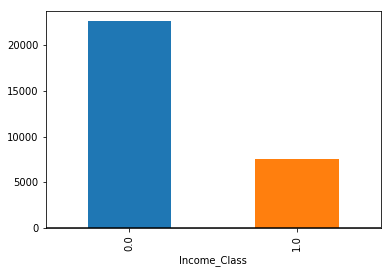

In [101]:
gb = df_train_num.groupby(targetName)
targetEDA=gb[targetName].aggregate(len)
plt.figure()
targetEDA.plot(kind='bar', grid=False)
plt.axhline(0, color='k')

Since an 88x88 correlation matrix would be unweildy, the following displays the top 5 positive and top 5 negative correlations for the target variable.   

In [102]:
pd.options.display.max_rows = 10
correlations = df_train_num.corr()
correlations = correlations[targetName]
correlations = correlations[1:,] 
correlations.sort_values(ascending=False)

Marital_status_ Married-civ-spouse    0.445418
Relationship_ Husband                 0.401236
Education_num                         0.335286
Age                                   0.241998
Hours_Per_Week                        0.229480
                                        ...   
Occupation_ Other-service            -0.165934
Relationship_ Not-in-family          -0.193258
Sex_ Female                          -0.216699
Relationship_ Own-child              -0.226186
Marital_status_ Never-married        -0.320053
Name: Income_Class, Length: 88, dtype: float64

No real surprises here.  The higher income class category positively correlates most strongly with being married (to a civilian spouse), being a married man, higher education, higher age, and higher hours worked.  The following correlates negatively the strongest: being never married, being a child of the head of the house, being female, being single, or in a service occupation.

# Models
Now we'll explore different models.

### KNN
First we'll do a K Nearest Neighbor model with default settings. 

In [76]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
#Call up the model to see the parameters you can tune (and their default setting)
print(knn) 
#Fit knn to the training data
knn = knn.fit(features_train, target_train)
#Predict clf KNN against test data
target_predicted_knn = knn.predict(features_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


In [77]:
print("KNN Accuracy Score", accuracy_score(target_test, target_predicted_knn))
target_names = ["<= $50K", "> $50K"]
print("Classification Report")
print(classification_report(target_test, target_predicted_knn, target_names=target_names))
print("Confusion Matrix")
print(confusion_matrix(target_test, target_predicted_knn))
print("Confusion Matrix Percent")
print(100*(confusion_matrix(target_test, target_predicted_knn))/len(target_test.index))

KNN Accuracy Score 0.819057104914
Classification Report
             precision    recall  f1-score   support

    <= $50K       0.87      0.90      0.88     11360
     > $50K       0.65      0.57      0.61      3700

avg / total       0.81      0.82      0.81     15060

Confusion Matrix
[[10222  1138]
 [ 1587  2113]]
Confusion Matrix Percent
[[ 67.875166     7.5564409 ]
 [ 10.53784861  14.03054449]]


We see that the KNN classifier with default settings had an accuracy of 81.9%.  Now let's do a grid search on the number of neighbors and see the best solution.

In [78]:
# use a full grid over several parameters and cross validate 5 times
from sklearn.model_selection import GridSearchCV
param_grid = {"n_neighbors": [3,5,7,9,12,15,20,30,40,50]}
# run grid search
grid_search = GridSearchCV(knn, param_grid=param_grid,n_jobs=-1,cv=5,return_train_score=True)
grid_search.fit(features_train, target_train)
print("Best Params:", grid_search.best_params_) 
print("Best Score:", grid_search.best_score_) 
print("Best Estimator", grid_search.best_estimator_) 
print("Grid Scores:")
pd.DataFrame(grid_search.cv_results_)

Best Params: {'n_neighbors': 20}
Best Score: 0.833698030635
Best Estimator KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')
Grid Scores:


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_n_neighbors,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,3.009965,51.692430,0.815463,0.893235,3,{'n_neighbors': 3},10,0.812863,0.894898,0.815183,...,0.818167,0.890961,0.815318,0.893742,0.815785,0.892752,0.431869,0.582183,0.001690,0.001324
1,2.634378,58.908670,0.822359,0.872978,5,{'n_neighbors': 5},9,0.816509,0.872850,0.823802,...,0.824797,0.873679,0.823442,0.871985,0.823247,0.872778,0.325751,0.702091,0.002974,0.000619
2,2.668756,64.310816,0.827167,0.864357,7,{'n_neighbors': 7},8,0.825791,0.864354,0.823305,...,0.828278,0.862862,0.830570,0.864816,0.827889,0.864614,0.238282,0.797516,0.002455,0.000791
3,2.946881,68.486197,0.830283,0.858572,9,{'n_neighbors': 9},7,0.827781,0.858925,0.826952,...,0.830764,0.857765,0.835046,0.858931,0.830874,0.858854,0.654360,1.497782,0.002851,0.000451
4,2.846881,72.971177,0.830946,0.852787,12,{'n_neighbors': 12},6,0.828278,0.851755,0.825626,...,0.829272,0.851962,0.838859,0.853792,0.832698,0.852596,0.309264,1.431546,0.004559,0.000880
5,2.471877,76.615004,0.832438,0.850797,15,{'n_neighbors': 15},4,0.828941,0.851962,0.828278,...,0.829935,0.850015,0.840849,0.850477,0.834190,0.850358,0.260596,1.083131,0.004682,0.000694
6,2.703131,81.219792,0.833698,0.846719,20,{'n_neighbors': 20},1,0.829604,0.848564,0.832422,...,0.832753,0.846450,0.838528,0.846291,0.835185,0.845966,0.278985,1.451774,0.002994,0.000936
7,2.696878,88.345418,0.833499,0.841829,30,{'n_neighbors': 30},2,0.827449,0.843922,0.830764,...,0.832919,0.841311,0.839854,0.840406,0.836511,0.841656,0.511262,1.355827,0.004333,0.001158
8,2.800004,93.644289,0.832836,0.839276,40,{'n_neighbors': 40},3,0.828278,0.840400,0.828775,...,0.832587,0.839281,0.839357,0.837837,0.835185,0.839625,0.352641,1.942850,0.004132,0.000832
9,2.884380,96.951520,0.831344,0.836881,50,{'n_neighbors': 50},5,0.825791,0.837664,0.827946,...,0.829438,0.837167,0.837036,0.835765,0.836511,0.836269,0.465471,4.030956,0.004585,0.000742


The grid search revealed that n=20 is the best solution.  Let's run the model with that parameter and see the result.    

In [104]:
knn = KNeighborsClassifier(n_neighbors=20)
#Call up the model to see the parameters you can tune (and their default setting)
print(knn)
#Fit clf to the training data
knn = knn.fit(features_train, target_train)
#Predict clf KNN against test data
target_predicted_knn = knn.predict(features_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')


In [80]:
print("KNN Accuracy Score", accuracy_score(target_test, target_predicted_knn))
target_names = ["<= $50K", "> $50K"]
print("Classification Report")
print(classification_report(target_test, target_predicted_knn, target_names=target_names))
print("Confusion Matrix")
print(confusion_matrix(target_test, target_predicted_knn))
print("Confusion Matrix Percent")
print(100*(confusion_matrix(target_test, target_predicted_knn))/len(target_test.index))

KNN Accuracy Score 0.830942895086
Classification Report
             precision    recall  f1-score   support

    <= $50K       0.86      0.92      0.89     11360
     > $50K       0.70      0.56      0.62      3700

avg / total       0.82      0.83      0.82     15060

Confusion Matrix
[[10458   902]
 [ 1644  2056]]
Confusion Matrix Percent
[[ 69.44223108   5.98937583]
 [ 10.91633466  13.65205843]]


Accuracy improved from 81.9% to 83.1% using n=20 in the KNN.

Now we'll use a Manhattan distance in the KNN to see how it compares to the Euclidean. 

In [81]:
knn = KNeighborsClassifier(n_neighbors=20, p=1)
#Fit clf to the training data
knn = knn.fit(features_train, target_train)
#Predict clf KNN against test data
target_predicted_knn = knn.predict(features_test)

In [82]:
print("KNN Accuracy Score", accuracy_score(target_test, target_predicted_knn))
target_names = ["<= $50K", "> $50K"]
print("Classification Report")
print(classification_report(target_test, target_predicted_knn, target_names=target_names))
print("Confusion Matrix")
print(confusion_matrix(target_test, target_predicted_knn))
print("Confusion Matrix Percent")
print(100*(confusion_matrix(target_test, target_predicted_knn))/len(target_test.index))

KNN Accuracy Score 0.830478087649
Classification Report
             precision    recall  f1-score   support

    <= $50K       0.86      0.92      0.89     11360
     > $50K       0.70      0.54      0.61      3700

avg / total       0.82      0.83      0.82     15060

Confusion Matrix
[[10499   861]
 [ 1692  2008]]
Confusion Matrix Percent
[[ 69.71447543   5.71713147]
 [ 11.23505976  13.33333333]]


Accuracy declined slightly when using Manhattan distances.  Thus, Euclidean distance (p=2) was determined to be optimal.  

Now let's cross validate.

In [83]:
#verify KNN with Cross Validation
knn = KNeighborsClassifier(n_neighbors=20, p=2) #next 3 lines rerun code for best tweaked solution for later use
knn.fit(features_train, target_train)
target_predicted_knn = knn.predict(features_test)
scores_knn = cross_val_score(knn, features_train, target_train, cv=10)
print("Cross Validation Score for each K",scores_knn)
print("Mean cross validation score", scores_knn.mean())

Cross Validation Score for each K [ 0.83095791  0.83327809  0.83592973  0.83128936  0.83753316  0.82625995
  0.83653846  0.84316976  0.8384743   0.8331675 ]
Mean cross validation score 0.834659820514


The cross validation scores look consistant, suggesting this model is not overfit.

### Decision Tree
Now we'll use a decision tree model, starting with default settings. 

In [84]:
#Decision Tree train model
from sklearn import tree 
clf = tree.DecisionTreeClassifier(random_state=123)
print(clf)
clf = clf.fit(features_train, target_train)
#DT test model
target_predicted_dt = clf.predict(features_test)
print("DT Accuracy Score", accuracy_score(target_test, target_predicted_dt))
target_names = ["<= $50K", "> $50K"]
print("Classification Report")
print(classification_report(target_test, target_predicted_dt, target_names=target_names))
print("Confusion Matrix")
print(confusion_matrix(target_test, target_predicted_dt))
print("Confusion Matrix Percent")
print(100*(confusion_matrix(target_test, target_predicted_dt))/len(target_test.index))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')
DT Accuracy Score 0.796082337317
Classification Report
             precision    recall  f1-score   support

    <= $50K       0.87      0.86      0.86     11360
     > $50K       0.58      0.59      0.59      3700

avg / total       0.80      0.80      0.80     15060

Confusion Matrix
[[9810 1550]
 [1521 2179]]
Confusion Matrix Percent
[[ 65.13944223  10.29216467]
 [ 10.09960159  14.4687915 ]]


We see that the decision tree classifier with default settings had an accuracy of 79.6%.  

Now let's tweak the parameters to see if we can get better results.  Let's start with a grid serach on max depth of the tree.

In [85]:
param_grid = {"max_depth": [3,4,5,6,7,8,9,10,15,20]}
# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid,n_jobs=-1,cv=5,return_train_score=True)
grid_search.fit(features_train, target_train)
print("Best Params:", grid_search.best_params_) 
print("Best Score:", grid_search.best_score_) 
print("Best Estimator", grid_search.best_estimator_) 
print("Grid Scores:")
pd.DataFrame(grid_search.cv_results_)

Best Params: {'max_depth': 9}
Best Score: 0.853391684902
Best Estimator DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')
Grid Scores:


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.290104,0.012499,0.840263,0.840329,3,{'max_depth': 3},8,0.834245,0.841767,0.835405,...,0.843030,0.839654,0.847646,0.838500,0.840988,0.840164,0.030796,6.249690e-03,0.004950,0.001218
1,0.475000,0.009373,0.840926,0.841688,4,{'max_depth': 4},7,0.833250,0.842264,0.835737,...,0.843362,0.839985,0.846651,0.838707,0.845631,0.845634,0.033656,7.653215e-03,0.005416,0.002354
2,0.568757,0.015624,0.842815,0.845285,5,{'max_depth': 5},6,0.837063,0.846782,0.837726,...,0.842864,0.843881,0.845159,0.841442,0.851268,0.850193,0.041457,2.953312e-06,0.005214,0.002980
3,0.790628,0.018746,0.848783,0.851800,6,{'max_depth': 6},5,0.844853,0.854490,0.843693,...,0.851649,0.850139,0.851790,0.849399,0.851932,0.852223,0.077562,6.247902e-03,0.003702,0.001835
4,0.912500,0.012500,0.850540,0.855033,7,{'max_depth': 7},4,0.846014,0.856273,0.846677,...,0.852312,0.853247,0.854277,0.853378,0.853424,0.856202,0.041458,1.169240e-02,0.003488,0.001407
5,1.071879,0.015624,0.851668,0.859252,8,{'max_depth': 8},3,0.846842,0.861412,0.849494,...,0.850157,0.856190,0.856432,0.857315,0.855414,0.860387,0.046978,9.881439e-03,0.003661,0.002097
6,1.081253,0.021876,0.853392,0.864772,9,{'max_depth': 9},1,0.847340,0.866095,0.850986,...,0.854136,0.864147,0.857759,0.862578,0.856740,0.865401,0.084085,1.249890e-02,0.003828,0.001273
7,0.956254,0.015625,0.852066,0.869107,10,{'max_depth': 10},2,0.843693,0.870529,0.848997,...,0.854799,0.868664,0.857593,0.866639,0.855248,0.870167,0.028641,2.198628e-06,0.005053,0.001387
8,1.271877,0.015624,0.838207,0.901979,15,{'max_depth': 15},9,0.835903,0.904347,0.833582,...,0.835571,0.899001,0.847480,0.901699,0.838501,0.901040,0.033658,8.529922e-07,0.004893,0.001938
9,1.303129,0.009374,0.825608,0.938714,20,{'max_depth': 20},10,0.818333,0.944631,0.820322,...,0.826455,0.934933,0.834218,0.936593,0.828718,0.935767,0.095089,7.653682e-03,0.005751,0.003771


The grid search showed that the best max depth is 9.  Let's run the model again with that figure.

In [105]:
clf = tree.DecisionTreeClassifier(max_depth=9,random_state=123)
clf = clf.fit(features_train, target_train)
#DT test model
target_predicted_dt = clf.predict(features_test)
print("DT Accuracy Score", accuracy_score(target_test, target_predicted_dt))
target_names = ["<= $50K", "> $50K"]
print("Classification Report")
print(classification_report(target_test, target_predicted_dt, target_names=target_names))
print("Confusion Matrix")
print(confusion_matrix(target_test, target_predicted_dt))
print("Confusion Matrix Percent")
print(100*(confusion_matrix(target_test, target_predicted_dt))/len(target_test.index))

DT Accuracy Score 0.8419654714475432
Classification Report
             precision    recall  f1-score   support

    <= $50K       0.88      0.91      0.90     11360
     > $50K       0.70      0.63      0.66      3700

avg / total       0.84      0.84      0.84     15060

Confusion Matrix
[[10347  1013]
 [ 1367  2333]]
Confusion Matrix Percent
[[68.70517928  6.72642762]
 [ 9.07702523 15.49136786]]


Accuracy increased from 79.6% to 84.2% with this change.  The number of false positives in particular dropped significantly, from 10.3% to 6.7%.  

Now we'll try the decision tree using information gain vice Gini impurity for the split quality criterion.

In [87]:
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=9,random_state=123)
clf = clf.fit(features_train, target_train)
#DT test model
target_predicted_dt = clf.predict(features_test)
print("DT Accuracy Score", accuracy_score(target_test, target_predicted_dt))
target_names = ["<= $50K", "> $50K"]
print("Classification Report")
print(classification_report(target_test, target_predicted_dt, target_names=target_names))
print("Confusion Matrix")
print(confusion_matrix(target_test, target_predicted_dt))
print("Confusion Matrix Percent")
print(100*(confusion_matrix(target_test, target_predicted_dt))/len(target_test.index))

DT Accuracy Score 0.840637450199
Classification Report
             precision    recall  f1-score   support

    <= $50K       0.88      0.91      0.90     11360
     > $50K       0.69      0.63      0.66      3700

avg / total       0.84      0.84      0.84     15060

Confusion Matrix
[[10335  1025]
 [ 1375  2325]]
Confusion Matrix Percent
[[ 68.62549801   6.8061089 ]
 [  9.13014608  15.43824701]]


Accuracy dropped slightly using information gain (84.1% vice 84.2%). 

Now we'll cross validate the decision tree, using the Gini impurity as that was more accurate.

In [88]:
#verify DT with Cross Validation
clf = tree.DecisionTreeClassifier(max_depth=9,random_state=123)
clf = clf.fit(features_train, target_train)
target_predicted_dt = clf.predict(features_test)
scores = cross_val_score(clf, features_train, target_train, cv=10)
print("Cross Validation Score for each K",scores)
scores.mean()                             

Cross Validation Score for each K [ 0.83990719  0.84852502  0.85382831  0.84686775  0.84714854  0.85377984
  0.85046419  0.85775862  0.85936982  0.85207297]


0.85097222528225969

The cross validation scores for the decision tree are fairly close together, suggesting this model isn't overfit.

###Random Forest
Now we'll try the random forest.  

In [89]:
# train random forest model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=123)
rf = rf.fit(features_train, target_train)
print(rf)
# test random forest model
target_predicted_rf = rf.predict(features_test)
print("RF Accuracy Score", accuracy_score(target_test, target_predicted_rf))
target_names = ["<= $50K", "> $50K"]
print("Classification Report")
print(classification_report(target_test, target_predicted_rf, target_names=target_names))
print("Confusion Matrix")
print(confusion_matrix(target_test, target_predicted_rf))
print("Confusion Matrix Percent")
print(100*(confusion_matrix(target_test, target_predicted_rf))/len(target_test.index))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=123, verbose=0, warm_start=False)
RF Accuracy Score 0.837383798141
Classification Report
             precision    recall  f1-score   support

    <= $50K       0.87      0.92      0.90     11360
     > $50K       0.71      0.57      0.63      3700

avg / total       0.83      0.84      0.83     15060

Confusion Matrix
[[10505   855]
 [ 1594  2106]]
Confusion Matrix Percent
[[ 69.75431607   5.67729084]
 [ 10.58432935  13.98406375]]


The random forest with default settings had an accuracy of 83.7%.  Let's do a grid seach of the numner of estimators.

In [90]:
param_grid = {"n_estimators": [10,20,40,60,80,100,150,200,250,300,350,400,500]}
# run grid search
grid_search = GridSearchCV(rf, param_grid=param_grid,n_jobs=-1,cv=5,return_train_score=True)
grid_search.fit(features_train, target_train)
print("Best Params:", grid_search.best_params_) 
print("Best Score:", grid_search.best_score_) 
print("Best Estimator", grid_search.best_estimator_) 
print("Grid Scores:")
pd.DataFrame(grid_search.cv_results_)

Best Params: {'n_estimators': 100}
Best Score: 0.854154233804
Best Estimator RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=123, verbose=0, warm_start=False)
Grid Scores:


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,1.637499,0.065628,0.846031,0.987592,10,{'n_estimators': 10},13,0.845185,0.988769,0.843196,...,0.844025,0.987235,0.853780,0.986780,0.843973,0.986863,0.132724,0.011688,0.003926,0.000803
1,3.790419,0.165627,0.850176,0.995740,20,{'n_estimators': 20},12,0.850655,0.995938,0.848500,...,0.848500,0.995980,0.854609,0.995276,0.848615,0.995442,0.318657,0.028979,0.002364,0.000318
2,7.896889,0.262500,0.851867,0.998939,40,{'n_estimators': 40},11,0.851152,0.999254,0.849329,...,0.849660,0.998922,0.856101,0.999047,0.853092,0.998384,0.498883,0.015312,0.002500,0.000297
3,11.809397,0.412503,0.852430,0.999776,60,{'n_estimators': 60},10,0.852644,0.999834,0.847174,...,0.850820,0.999751,0.858753,0.999834,0.852761,0.999668,0.309741,0.060600,0.003751,0.000062
4,15.493070,0.528126,0.853325,0.999851,80,{'n_estimators': 80},7,0.852644,0.999793,0.848997,...,0.853638,0.999917,0.857924,0.999917,0.853424,0.999876,0.124685,0.041224,0.002845,0.000067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,48.385806,1.609378,0.853226,0.999975,250,{'n_estimators': 250},9,0.853307,1.000000,0.850323,...,0.851318,0.999959,0.858090,1.000000,0.853092,0.999959,0.499808,0.211256,0.002674,0.000020
9,57.736316,1.828129,0.853259,0.999975,300,{'n_estimators': 300},8,0.852644,1.000000,0.849660,...,0.852147,0.999959,0.858256,1.000000,0.853590,0.999959,0.373205,0.022097,0.002816,0.000020
10,67.482784,2.142336,0.853624,0.999975,350,{'n_estimators': 350},4,0.854136,1.000000,0.849494,...,0.852147,0.999959,0.857593,1.000000,0.854750,0.999959,0.217008,0.060649,0.002703,0.000020
11,77.473933,2.734377,0.853591,0.999975,400,{'n_estimators': 400},5,0.854136,1.000000,0.848334,...,0.853473,0.999959,0.857427,1.000000,0.854585,0.999959,0.399607,0.368566,0.002955,0.000020


The grid search determined a n estimators value of 100 as optimal.  Now let's run the model with that figure.

In [106]:
# train random forest model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 100, random_state=123)
rf = rf.fit(features_train, target_train)
# test random forest model
target_predicted_rf = rf.predict(features_test)
print("RF Accuracy Score", accuracy_score(target_test, target_predicted_rf))
target_names = ["<= $50K", "> $50K"]
print("Classification Report")
print(classification_report(target_test, target_predicted_rf, target_names=target_names))
print("Confusion Matrix")
print(confusion_matrix(target_test, target_predicted_rf))
print("Confusion Matrix Percent")
print(100*(confusion_matrix(target_test, target_predicted_rf))/len(target_test.index))

RF Accuracy Score 0.8440903054448872
Classification Report
             precision    recall  f1-score   support

    <= $50K       0.88      0.92      0.90     11360
     > $50K       0.72      0.60      0.66      3700

avg / total       0.84      0.84      0.84     15060

Confusion Matrix
[[10480   880]
 [ 1468  2232]]
Confusion Matrix Percent
[[69.58831341  5.84329349]
 [ 9.74767596 14.82071713]]


The model improved with a modest rise in accuracy from 83.7% to 84.4%.

Now let's try chaning the class weight to the 'balanced', where columns with a greater count have more weight.

In [77]:
# train random forest model 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 100, class_weight='balanced', random_state=123)
rf = rf.fit(features_train, target_train)
# test random forest model
target_predicted_rf = rf.predict(features_test)
print("RF Accuracy Score", accuracy_score(target_test, target_predicted_rf))
target_names = ["<= $50K", "> $50K"]
print("Classification Report")
print(classification_report(target_test, target_predicted_rf, target_names=target_names))
print("Confusion Matrix")
print(confusion_matrix(target_test, target_predicted_rf))
print("Confusion Matrix Percent")
print(100*(confusion_matrix(target_test, target_predicted_rf))/len(target_test.index))

RF Accuracy Score 0.84395750332
Classification Report
             precision    recall  f1-score   support

    <= $50K       0.88      0.93      0.90     11360
     > $50K       0.72      0.60      0.65      3700

avg / total       0.84      0.84      0.84     15060

Confusion Matrix
[[10508   852]
 [ 1498  2202]]
Confusion Matrix Percent
[[ 69.77423639   5.65737052]
 [  9.94687915  14.62151394]]


The accuracy decreased slightly but still rounds to 84.4%.

Now let's cross validate the random forest model.

In [78]:
#verify RF with cross validation
rf = RandomForestClassifier(n_estimators= 100, random_state=123) #best tweaked solution above
scores_rf = cross_val_score(rf, features_train, target_train, cv=10, n_jobs=-1)
print("Cross Validation Score for each K",scores_rf)
scores_rf.mean()

Cross Validation Score for each K [ 0.83891283  0.85946304  0.85051376  0.8471992   0.85709549  0.8494695
  0.8561008   0.85941645  0.85903814  0.84875622]


0.85259654196059564

The cross validation results are consistant, suggesting the model isn't overfit.

###Support Vector Machine - Linear

Now let's try a linear SVM with default settings.  

In [37]:
#from sklearn import svm
from sklearn.svm import SVC
linsvm = SVC(kernel='linear', probability=True, random_state=123) #max_depth=3,n_estimators=10,class_weight='balanced')
linsvm.fit(features_train, target_train)
predicted_linsvm=linsvm.predict(features_test)
print(linsvm)
print("other svc Accuracy Score", accuracy_score(target_test, predicted_linsvm))
target_names = ["<= $50K", "> $50K"]
print("Classification Report")
print(classification_report(target_test, predicted_linsvm, target_names=target_names))
print("Confusion Matrix")
print(confusion_matrix(target_test, predicted_linsvm))
print("Confusion Matrix Percent")
print(100*(confusion_matrix(target_test, predicted_linsvm))/len(target_test.index))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=123, shrinking=True,
  tol=0.001, verbose=False)
other svc Accuracy Score 0.847543160691
Classification Report
             precision    recall  f1-score   support

    <= $50K       0.88      0.93      0.90     11360
     > $50K       0.73      0.60      0.66      3700

avg / total       0.84      0.85      0.84     15060

Confusion Matrix
[[10530   830]
 [ 1466  2234]]
Confusion Matrix Percent
[[ 69.92031873   5.51128818]
 [  9.73439575  14.83399734]]


The default settings produced an accuracy of 84.8%.  Let's try a grid search of the penalty parameter.

In [39]:
param_grid = {'C':[1,5,10,15,20]}

grid_search = GridSearchCV(linsvm, param_grid=param_grid,n_jobs=-1,cv=5,return_train_score=True)
grid_search.fit(features_train, target_train)


print("Best Params:", grid_search.best_params_) 
print("Best Score:", grid_search.best_score_) 
print("Best Estimator", grid_search.best_estimator_)
print("Grid Scores:")
pd.DataFrame(grid_search.cv_results_)

Best Params: {'C': 10}
Best Score: 0.846827133479
Best Estimator SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=123, shrinking=True,
  tol=0.001, verbose=False)
Grid Scores:


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,1213.355169,24.631265,0.845932,0.848037,1,{'C': 1},5,0.841372,0.848730,0.842533,...,0.847174,0.848481,0.848972,0.846498,0.849610,0.847085,7.905853,0.461572,0.003366,0.001076
1,1280.917448,23.718765,0.846595,0.848949,5,{'C': 5},3,0.843030,0.850305,0.843527,...,0.847340,0.849559,0.848806,0.846830,0.850274,0.847913,10.501179,0.230276,0.002867,0.001356
2,1340.921759,23.459390,0.846827,0.849007,10,{'C': 10},1,0.844025,0.850139,0.843693,...,0.846842,0.849683,0.848641,0.847120,0.850937,0.847872,8.364369,0.553893,0.002751,0.001270
3,1393.728676,23.118766,0.846794,0.848966,15,{'C': 15},2,0.844356,0.850139,0.843527,...,0.847174,0.849434,0.848309,0.847244,0.850605,0.847748,15.020301,0.532957,0.002591,0.001243
4,1307.180304,19.578143,0.846562,0.848941,20,{'C': 20},4,0.844190,0.850097,0.843196,...,0.846677,0.849434,0.848309,0.847120,0.850439,0.847789,239.990557,4.501596,0.002648,0.001263


The grid search revealed a C of 10 as best. Let's run the model with that parameter.

In [40]:
linsvm = SVC(C=10, kernel='linear', probability=True, random_state=123) #max_depth=3,n_estimators=10,class_weight='balanced')
linsvm.fit(features_train, target_train)
predicted_linsvm=linsvm.predict(features_test)
print("other svc Accuracy Score", accuracy_score(target_test, predicted_linsvm))
target_names = ["<= $50K", "> $50K"]
print("Classification Report")
print(classification_report(target_test, predicted_linsvm, target_names=target_names))
print("Confusion Matrix")
print(confusion_matrix(target_test, predicted_linsvm))
print("Confusion Matrix Percent")
print(100*(confusion_matrix(target_test, predicted_linsvm))/len(target_test.index))

other svc Accuracy Score 0.847875166003
Classification Report
             precision    recall  f1-score   support

    <= $50K       0.88      0.93      0.90     11360
     > $50K       0.73      0.61      0.66      3700

avg / total       0.84      0.85      0.84     15060

Confusion Matrix
[[10519   841]
 [ 1450  2250]]
Confusion Matrix Percent
[[ 69.84727756   5.58432935]
 [  9.62815405  14.94023904]]


Accuracy increased slightly but is virtually unchanged.  Now let's try a grid search of the degree of the polynomial function.

In [42]:
param_grid = {'degree':[1,2,3,4,5]}

grid_search = GridSearchCV(linsvm, param_grid=param_grid,n_jobs=-1,cv=5,return_train_score=True)
grid_search.fit(features_train, target_train)


print("Best Params:", grid_search.best_params_) 
print("Best Score:", grid_search.best_score_) 
print("Best Estimator", grid_search.best_estimator_)
print("Grid Scores:")
pd.DataFrame(grid_search.cv_results_)

Best Params: {'degree': 1}
Best Score: 0.846827133479
Best Estimator SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=123, shrinking=True,
  tol=0.001, verbose=False)
Grid Scores:


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_degree,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,1342.590867,23.746890,0.846827,0.849007,1,{'degree': 1},1,0.844025,0.850139,0.843693,...,0.846842,0.849683,0.848641,0.84712,0.850937,0.847872,12.942726,0.742633,0.002751,0.00127
1,1339.347711,23.265639,0.846827,0.849007,2,{'degree': 2},1,0.844025,0.850139,0.843693,...,0.846842,0.849683,0.848641,0.84712,0.850937,0.847872,10.185917,0.512253,0.002751,0.00127
2,1338.544585,23.462514,0.846827,0.849007,3,{'degree': 3},1,0.844025,0.850139,0.843693,...,0.846842,0.849683,0.848641,0.84712,0.850937,0.847872,14.793538,0.305004,0.002751,0.00127
3,1338.397711,23.290639,0.846827,0.849007,4,{'degree': 4},1,0.844025,0.850139,0.843693,...,0.846842,0.849683,0.848641,0.84712,0.850937,0.847872,13.677162,0.501815,0.002751,0.00127
4,1212.723884,21.259387,0.846827,0.849007,5,{'degree': 5},1,0.844025,0.850139,0.843693,...,0.846842,0.849683,0.848641,0.84712,0.850937,0.847872,250.364330,4.835949,0.002751,0.00127


The grid search revelaed a degree of 1 to be best, though it's effectivly tied with the other degrees per the grid search above.  Let's run the model with that figure.

In [107]:
linsvm = SVC(C=10, kernel='linear', degree=1, probability=True, random_state=123) #max_depth=3,n_estimators=10,class_weight='balanced')
linsvm.fit(features_train, target_train)
predicted_linsvm=linsvm.predict(features_test)
print("other svc Accuracy Score", accuracy_score(target_test, predicted_linsvm))
target_names = ["<= $50K", "> $50K"]
print("Classification Report")
print(classification_report(target_test, predicted_linsvm, target_names=target_names))
print("Confusion Matrix")
print(confusion_matrix(target_test, predicted_linsvm))
print("Confusion Matrix Percent")
print(100*(confusion_matrix(target_test, predicted_linsvm))/len(target_test.index))

other svc Accuracy Score 0.847875166002656
Classification Report
             precision    recall  f1-score   support

    <= $50K       0.88      0.93      0.90     11360
     > $50K       0.73      0.61      0.66      3700

avg / total       0.84      0.85      0.84     15060

Confusion Matrix
[[10519   841]
 [ 1450  2250]]
Confusion Matrix Percent
[[69.84727756  5.58432935]
 [ 9.62815405 14.94023904]]


Accuracy is virtually unchanged.  Now let's cross validate.

In [45]:
#verify Linear SVC with Cross Validation
scores = cross_val_score(linsvm, features_train, target_train, cv=10)
print("Cross Validation Score for each K",scores)
scores.mean()                             

Cross Validation Score for each K [ 0.8435532   0.84653629  0.84819357  0.83924428  0.84615385  0.85013263
  0.84615385  0.84913793  0.85538972  0.84742952]


0.84719248315292117

The cross validation scores for the linear SVC are fairly close together, suggesting this model isn't overfit.

###SVM-RBF 
Now let's try the SVM-RBF with default parameters.  

In [123]:
from sklearn.svm import SVC
clf_rbf = SVC(kernel='rbf', random_state=123) 
clf_rbf.fit(features_train, target_train)
predicted_rbf=clf_rbf.predict(features_test)
print(clf_rbf)
print("RBF Accuracy Score", accuracy_score(target_test, predicted_rbf))
target_names = ["<= $50K", "> $50K"]
print("Classification Report")
print(classification_report(target_test, predicted_rbf, target_names=target_names))
print("Confusion Matrix")
print(confusion_matrix(target_test, predicted_rbf))
print("Confusion Matrix Percent")
print(100*(confusion_matrix(target_test, predicted_rbf))/len(target_test.index))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=123, shrinking=True,
  tol=0.001, verbose=False)
RBF Accuracy Score 0.8272244355909695
Classification Report
             precision    recall  f1-score   support

    <= $50K       0.87      0.91      0.89     11360
     > $50K       0.68      0.57      0.62      3700

avg / total       0.82      0.83      0.82     15060

Confusion Matrix
[[10358  1002]
 [ 1600  2100]]
Confusion Matrix Percent
[[68.77822045  6.65338645]
 [10.62416999 13.94422311]]


The model calculates 82.7% accuracy.  Now let's run a grid search of the penalty parameter, C. 

In [54]:
param_grid = {'C':[.5,1,5,10,15,20]}
grid_search = GridSearchCV(clf_rbf, param_grid=param_grid,n_jobs=-1,cv=5,return_train_score=True)
grid_search.fit(features_train, target_train)
print("Best Params:", grid_search.best_params_) 
print("Best Score:", grid_search.best_score_) 
print("Best Estimator", grid_search.best_estimator_)
print("Grid Scores:")
pd.DataFrame(grid_search.cv_results_)

Best Params: {'C': 20}
Best Score: 0.843147006167
Best Estimator SVC(C=20, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=123, shrinking=True,
  tol=0.001, verbose=False)
Grid Scores:


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,199.820558,29.068766,0.818679,0.819118,0.5,{'C': 0.5},6,0.822311,0.820962,0.813691,...,0.812200,0.817813,0.829410,0.821384,0.815785,0.817165,1.626299,0.382428,0.006381,0.001719
1,196.542675,28.128142,0.823122,0.823984,1,{'C': 1},5,0.826952,0.827137,0.817006,...,0.817338,0.822330,0.834052,0.825528,0.820262,0.822096,1.025101,0.448240,0.006529,0.001998
2,183.084490,26.428143,0.835522,0.836931,5,{'C': 5},4,0.835074,0.838410,0.830433,...,0.835074,0.836089,0.841844,0.835433,0.835185,0.836352,1.443149,0.484385,0.003644,0.001228
3,181.390741,25.881264,0.838439,0.840238,10,{'C': 10},3,0.838720,0.841436,0.833582,...,0.839383,0.839073,0.843170,0.839121,0.837340,0.840454,2.196188,0.462943,0.003103,0.000983
4,181.381365,25.903141,0.841058,0.843106,15,{'C': 15},2,0.841870,0.844005,0.837394,...,0.840875,0.841104,0.845656,0.842644,0.839496,0.842858,3.169261,0.263205,0.002746,0.001294
5,158.227068,21.637511,0.843147,0.845203,20,{'C': 20},1,0.844688,0.846160,0.838555,...,0.842864,0.843549,0.848806,0.844965,0.840822,0.844101,30.621704,4.281204,0.003492,0.001346


The grid search shows that the best C is 20.  Let's run the model with that value.

In [108]:
clf_rbf = SVC(kernel='rbf', C=20.0, random_state=123) 
clf_rbf.fit(features_train, target_train)
predicted_rbf=clf_rbf.predict(features_test)
# summarize the fit of the model
print("RBF Accuracy Score", accuracy_score(target_test, predicted_rbf))
target_names = ["<= $50K", "> $50K"]
print("Classification Report")
print(classification_report(target_test, predicted_rbf, target_names=target_names))
print("Confusion Matrix")
print(confusion_matrix(target_test, predicted_rbf))
print("Confusion Matrix Percent")
print(100*(confusion_matrix(target_test, predicted_rbf))/len(target_test.index))

RBF Accuracy Score 0.8427622841965472
Classification Report
             precision    recall  f1-score   support

    <= $50K       0.87      0.93      0.90     11360
     > $50K       0.73      0.58      0.64      3700

avg / total       0.84      0.84      0.84     15060

Confusion Matrix
[[10551   809]
 [ 1559  2141]]
Confusion Matrix Percent
[[70.05976096  5.37184595]
 [10.35192563 14.21646746]]


The model showed am improvement from 82.7% to 84.3% accuracy.  Now let's try it with a class weight of balanced. 

In [56]:
from sklearn.svm import SVC
clf_rbf = SVC(kernel='rbf', C=20, random_state=123, class_weight='balanced') #degree=3, gamma=0.1)
clf_rbf.fit(features_train, target_train)
predicted_rbf=clf_rbf.predict(features_test)
# summarize the fit of the model
print("RBF Accuracy Score", accuracy_score(target_test, predicted_rbf))
target_names = ["<= $50K", "> $50K"]
print("Classification Report")
print(classification_report(target_test, predicted_rbf, target_names=target_names))
print("Confusion Matrix")
print(confusion_matrix(target_test, predicted_rbf))
print("Confusion Matrix Percent")
print(100*(confusion_matrix(target_test, predicted_rbf))/len(target_test.index))

RBF Accuracy Score 0.791965471448
Classification Report
             precision    recall  f1-score   support

    <= $50K       0.94      0.77      0.85     11360
     > $50K       0.55      0.85      0.67      3700

avg / total       0.85      0.79      0.80     15060

Confusion Matrix
[[8771 2589]
 [ 544 3156]]
Confusion Matrix Percent
[[ 58.24037185  17.19123506]
 [  3.6122178   20.9561753 ]]


Performance dropped from 84.3% to 79.2% accuracy with the balanced setting, so we won't use that setting.

Now we'll cross validate the SVC-RBF.

In [124]:
#verify SVC-RBF with Cross Validation
clf_rbf = SVC(kernel='rbf', C=20.0, random_state=123, probability=True) 
clf_rbf.fit(features_train, target_train)
predicted_rbf=clf_rbf.predict(features_test)
scores = cross_val_score(clf_rbf, features_train, target_train, cv=10)
print("Cross Validation Score for each K",scores)
scores.mean()                             

Cross Validation Score for each K [0.83891283 0.84852502 0.84255883 0.833941   0.8494695  0.83919098
 0.84980106 0.84781167 0.84676617 0.8371476 ]


0.8434124660503338

The cross validation scores for the SVC-RBF are fairly close together, suggesting this model isn't overfit.

###ANN

Now let's try the ANN with default settings.

In [58]:
from sklearn.neural_network import MLPClassifier
clf_NN = MLPClassifier(random_state=123) 
clf_NN.fit(features_train, target_train)
predicted_NN = clf_NN.predict(features_test)
print(clf_NN)
print("NN Accuracy Score", accuracy_score(target_test, predicted_NN))
target_names = ["<= $50K", "> $50K"]
print("Classification Report")
print(classification_report(target_test, predicted_NN, target_names=target_names))
print("Confusion Matrix")
print(confusion_matrix(target_test, predicted_NN))
print("Confusion Matrix Percent")
print(100*(confusion_matrix(target_test, predicted_NN))/len(target_test.index))

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=123,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
NN Accuracy Score 0.848671978752
Classification Report
             precision    recall  f1-score   support

    <= $50K       0.88      0.93      0.90     11360
     > $50K       0.73      0.61      0.67      3700

avg / total       0.84      0.85      0.84     15060

Confusion Matrix
[[10518   842]
 [ 1437  2263]]
Confusion Matrix Percent
[[ 69.84063745   5.59096946]
 [  9.54183267  15.02656042]]


The neural net had an accuracy score of 84.9%.  First let's find the optimal L2 penalty via a grid search. 

In [59]:
param_grid = {'alpha':[.0000001,.000001,.00001,.0001,.001,.01,.1,.3,.5]}

grid_search = GridSearchCV(clf_NN, param_grid=param_grid,n_jobs=-1,cv=5,return_train_score=True)
grid_search.fit(features_train, target_train)

print("Best Params:", grid_search.best_params_) 
print("Best Score:", grid_search.best_score_) 
print("Best Estimator", grid_search.best_estimator_)
print("Grid Scores:")
pd.DataFrame(grid_search.cv_results_)

Best Params: {'alpha': 0.01}
Best Score: 0.850772495193
Best Estimator MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=123,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
Grid Scores:


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,98.142757,0.049997,0.849977,0.868734,1e-07,{'alpha': 1e-07},3,0.847008,0.866468,0.846179,...,0.852975,0.869866,0.849138,0.869706,0.854585,0.868095,12.059963,0.006250,0.003291,0.001297
1,93.043809,0.043752,0.848916,0.868560,1e-06,{'alpha': 1e-06},6,0.846345,0.866841,0.844522,...,0.852312,0.869452,0.848475,0.869581,0.852927,0.867183,11.082648,0.006250,0.003278,0.001272
2,91.181305,0.050008,0.849579,0.869372,1e-05,{'alpha': 1e-05},5,0.847505,0.867089,0.845682,...,0.850655,0.871358,0.847977,0.869333,0.856077,0.869007,10.864212,0.011690,0.003617,0.001399
3,90.993808,0.046880,0.850507,0.868692,0.0001,{'alpha': 0.0001},2,0.847174,0.866799,0.848334,...,0.851981,0.870198,0.849469,0.869043,0.855580,0.868054,10.619945,0.009880,0.002994,0.001169
4,84.562556,0.043753,0.849778,0.868402,0.001,{'alpha': 0.001},4,0.846014,0.866302,0.846842,...,0.849826,0.868291,0.850464,0.868960,0.855745,0.869297,4.018548,0.011691,0.003431,0.001106
5,73.875046,0.050003,0.850772,0.865576,0.01,{'alpha': 0.01},1,0.844853,0.866136,0.846014,...,0.857285,0.862821,0.850133,0.866059,0.855580,0.866769,7.449164,0.006248,0.004972,0.001402
6,40.968775,0.050000,0.848352,0.852405,0.1,{'alpha': 0.1},7,0.844688,0.850843,0.843362,...,0.851815,0.853703,0.856598,0.851678,0.845299,0.849985,8.294496,0.006251,0.005053,0.002105
7,25.978144,0.043748,0.841821,0.843810,0.3,{'alpha': 0.3},8,0.843362,0.842969,0.833085,...,0.841372,0.843922,0.846320,0.842685,0.844968,0.843728,6.443358,0.006246,0.004670,0.001071
8,21.950011,0.037500,0.839102,0.840122,0.5,{'alpha': 0.5},9,0.839715,0.839985,0.832587,...,0.835737,0.840938,0.845988,0.840116,0.841486,0.840164,3.433784,0.007652,0.004631,0.000490


The grid search found an alpha of 0.01, so let's run the model with that.

In [60]:
from sklearn.neural_network import MLPClassifier
clf_NN = MLPClassifier(alpha=0.01, random_state=123)
clf_NN.fit(features_train, target_train)
predicted_NN = clf_NN.predict(features_test)
print("NN Accuracy Score", accuracy_score(target_test, predicted_NN))
target_names = ["<= $50K", "> $50K"]
print("Classification Report")
print(classification_report(target_test, predicted_NN, target_names=target_names))
print("Confusion Matrix")
print(confusion_matrix(target_test, predicted_NN))
print("Confusion Matrix Percent")
print(100*(confusion_matrix(target_test, predicted_NN))/len(target_test.index))

NN Accuracy Score 0.849070385126
Classification Report
             precision    recall  f1-score   support

    <= $50K       0.88      0.93      0.90     11360
     > $50K       0.74      0.59      0.66      3700

avg / total       0.84      0.85      0.84     15060

Confusion Matrix
[[10591   769]
 [ 1504  2196]]
Confusion Matrix Percent
[[ 70.32536521   5.1062417 ]
 [  9.98671979  14.58167331]]


Accuracy increased slightly but still rounds to 84.9%.  Now let's try adjusting the layer sizes (number of neurons) in the neural net via grid search.

In [61]:
param_grid = {'hidden_layer_sizes':[(2,),(5,),(10,),(50,),(100,),(200,),(400,)]}

grid_search = GridSearchCV(clf_NN, param_grid=param_grid,n_jobs=-1,cv=5,return_train_score=True)
grid_search.fit(features_train, target_train)

print("Best Params:", grid_search.best_params_) 
print("Best Score:", grid_search.best_score_) 
print("Best Estimator", grid_search.best_estimator_)
print("Grid Scores:")
pd.DataFrame(grid_search.cv_results_)

Best Params: {'hidden_layer_sizes': (100,)}
Best Score: 0.850772495193
Best Estimator MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=123,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
Grid Scores:


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_hidden_layer_sizes,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,42.115970,0.015623,0.847855,0.850292,"(2,)","{'hidden_layer_sizes': (2,)}",6,0.844522,0.851382,0.842035,...,0.851152,0.850926,0.851790,0.849192,0.849776,0.848991,3.547946,0.000004,0.003874,0.000995
1,23.703139,0.015627,0.848220,0.849156,"(5,)","{'hidden_layer_sizes': (5,)}",5,0.845019,0.849766,0.843693,...,0.850489,0.848978,0.853282,0.848363,0.848615,0.849447,1.526172,0.000002,0.003512,0.000474
2,33.193773,0.015625,0.850043,0.853765,"(10,)","{'hidden_layer_sizes': (10,)}",2,0.847505,0.855402,0.844688,...,0.852147,0.854739,0.851956,0.852549,0.853921,0.852679,7.829595,0.000006,0.003413,0.001130
3,58.868785,0.028125,0.849513,0.863661,"(50,)","{'hidden_layer_sizes': (50,)}",4,0.844025,0.865183,0.846345,...,0.851152,0.863235,0.851127,0.861210,0.854916,0.863827,9.800606,0.006251,0.003864,0.001411
4,75.787553,0.046874,0.850772,0.865576,"(100,)","{'hidden_layer_sizes': (100,)}",1,0.844853,0.866136,0.846014,...,0.857285,0.862821,0.850133,0.866059,0.855580,0.866769,18.023311,0.013968,0.004972,0.001402
5,98.315688,0.106250,0.849910,0.866256,"(200,)","{'hidden_layer_sizes': (200,)}",3,0.845848,0.867131,0.844356,...,0.849992,0.867255,0.854443,0.869167,0.854916,0.861340,15.953529,0.026882,0.004312,0.002624
6,170.538053,0.146872,0.847722,0.867515,"(400,)","{'hidden_layer_sizes': (400,)}",7,0.837394,0.861494,0.845848,...,0.854301,0.870736,0.851625,0.871073,0.849445,0.867846,43.205338,0.027242,0.005860,0.003481


The grid serach determined 100 as the optimal hidden layer size.  Let's do a grid search on the length.

In [62]:
param_grid = {'hidden_layer_sizes':[(100,),(100,2),(100,4),(100,6),(100,8)]}

grid_search = GridSearchCV(clf_NN, param_grid=param_grid,n_jobs=-1,cv=5,return_train_score=True)
grid_search.fit(features_train, target_train)

print("Best Params:", grid_search.best_params_) 
print("Best Score:", grid_search.best_score_) 
print("Best Estimator", grid_search.best_estimator_)
print("Grid Scores:")
pd.DataFrame(grid_search.cv_results_)

Best Params: {'hidden_layer_sizes': (100,)}
Best Score: 0.850772495193
Best Estimator MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=123,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
Grid Scores:


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_hidden_layer_sizes,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,73.369224,0.043753,0.850772,0.865576,"(100,)","{'hidden_layer_sizes': (100,)}",1,0.844853,0.866136,0.846014,...,0.857285,0.862821,0.850133,0.866059,0.855580,0.866769,7.075503,0.006253,0.004972,0.001402
1,114.341985,0.046874,0.847557,0.869588,"(100, 2)","{'hidden_layer_sizes': (100, 2)}",4,0.844025,0.866219,0.842533,...,0.849494,0.868167,0.851459,0.870990,0.850274,0.870830,14.796522,0.000002,0.003580,0.002072
2,85.018802,0.050005,0.848651,0.865592,"(100, 4)","{'hidden_layer_sizes': (100, 4)}",3,0.848831,0.864520,0.844356,...,0.848666,0.865473,0.848972,0.869416,0.852429,0.865526,16.146463,0.006246,0.002563,0.002115
3,63.737539,0.053128,0.849678,0.868618,"(100, 6)","{'hidden_layer_sizes': (100, 6)}",2,0.850157,0.868581,0.841538,...,0.850820,0.869410,0.850133,0.865562,0.855745,0.868965,5.694844,0.007654,0.004578,0.001668
4,73.621920,0.043753,0.846827,0.870441,"(100, 8)","{'hidden_layer_sizes': (100, 8)}",5,0.848003,0.874135,0.837560,...,0.844522,0.868208,0.849469,0.869001,0.854585,0.871700,17.381836,0.011694,0.005652,0.002187


The default was optimal.  Now let's run the model with the layers/nodes results from the grid search.

In [109]:
from sklearn.neural_network import MLPClassifier
clf_NN = MLPClassifier(alpha=0.01, hidden_layer_sizes=(100, ), random_state=123) 
clf_NN.fit(features_train, target_train)
predicted_NN = clf_NN.predict(features_test)
print("NN Accuracy Score", accuracy_score(target_test, predicted_NN))
target_names = ["<= $50K", "> $50K"]
print("Classification Report")
print(classification_report(target_test, predicted_NN, target_names=target_names))
print("Confusion Matrix")
print(confusion_matrix(target_test, predicted_NN))
print("Confusion Matrix Percent")
print(100*(confusion_matrix(target_test, predicted_NN))/len(target_test.index))

NN Accuracy Score 0.8490703851261621
Classification Report
             precision    recall  f1-score   support

    <= $50K       0.88      0.93      0.90     11360
     > $50K       0.74      0.59      0.66      3700

avg / total       0.84      0.85      0.84     15060

Confusion Matrix
[[10591   769]
 [ 1504  2196]]
Confusion Matrix Percent
[[70.32536521  5.1062417 ]
 [ 9.98671979 14.58167331]]


Accuracy was unchanged.  Now let's cross validate.

In [64]:
#verify NN with Cross Validation

scores = cross_val_score(clf_NN, features_train, target_train, cv=10)
print("Cross Validation Score for each K",scores)
scores.mean()                             

Cross Validation Score for each K [ 0.85084521  0.84918794  0.84819357  0.8435532   0.84781167  0.85311671
  0.8428382   0.85344828  0.85704809  0.85339967]


0.84994425291271136

The cross validation results are similar to each other, suggesting the model isn't overfit.

###Stochastic Gradient Descent

Now we'll try to Stochastic Gradient Descent with default settings.  (Exception: the loss function is set to 'log', so it uses a logistic regression, not a linear one.  This is more appropriate for what we're trying to do - predict above/below $50K, and allows for calculation of area under the ROC curve later). 

In [65]:
from sklearn import linear_model
clf_sgd = linear_model.SGDClassifier(loss='log', random_state=123)
clf_sgd.fit(features_train, target_train)
predicted_sgd=clf_sgd.predict(features_test)
print(clf_sgd)
# summarize the fit of the model
print("SGD Accuracy Score", accuracy_score(target_test, predicted_sgd))
target_names = ["<= $50K", "> $50K"]
print("Classification Report")
print(classification_report(target_test, predicted_sgd, target_names=target_names))
print("Confusion Matrix")
print(confusion_matrix(target_test, predicted_sgd))
print("Confusion Matrix Percent")
print(100*(confusion_matrix(target_test, predicted_sgd))/len(target_test.index))


D:\mlatw\Anaconda36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=123, shuffle=True,
       tol=None, verbose=0, warm_start=False)
SGD Accuracy Score 0.829747675963
Classification Report
             precision    recall  f1-score   support

    <= $50K       0.84      0.96      0.89     11360
     > $50K       0.78      0.43      0.55      3700

avg / total       0.82      0.83      0.81     15060

Confusion Matrix
[[10908   452]
 [ 2112  1588]]
Confusion Matrix Percent
[[ 72.43027888   3.00132802]
 [ 14.02390438  10.54448871]]


The SGD achieved an accuracy of 83.0%  Let's try adjusting the regularization term, alpha, with a grid search.

In [66]:
param_grid = {"alpha": [0.00001,0.0001,0.001,0.01,0.1,.5,1,2,5,10]}
# run grid search
grid_search = GridSearchCV(clf_sgd, param_grid=param_grid,n_jobs=-1,cv=5,return_train_score=True)
grid_search.fit(features_train, target_train)
print("Best Params:", grid_search.best_params_) 
print("Best Score:", grid_search.best_score_) 
print("Best Estimator", grid_search.best_estimator_) 
print("Grid Scores:")
pd.DataFrame(grid_search.cv_results_)

D:\mlatw\Anaconda36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Best Params: {'alpha': 0.0001}
Best Score: 0.833830647835
Best Estimator SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=123, shuffle=True,
       tol=None, verbose=0, warm_start=False)
Grid Scores:


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.362490,0.012496,0.797825,0.801357,1e-05,{'alpha': 1e-05},4,0.811371,0.821335,0.805404,...,0.823637,0.825397,0.753813,0.748695,0.794893,0.795284,0.075501,0.006248,0.023886,0.028298
1,0.412502,0.009377,0.833831,0.834129,0.0001,{'alpha': 0.0001},1,0.831759,0.836338,0.834576,...,0.840212,0.839363,0.838196,0.834107,0.824407,0.821226,0.048007,0.012503,0.005539,0.006765
2,0.412502,0.015624,0.833366,0.834751,0.001,{'alpha': 0.001},2,0.829604,0.836131,0.829604,...,0.831261,0.835426,0.841678,0.833527,0.834687,0.834280,0.032174,0.013975,0.004551,0.000918
3,0.374999,0.018751,0.817784,0.818621,0.01,{'alpha': 0.01},3,0.813691,0.817978,0.815183,...,0.819161,0.818517,0.821784,0.817033,0.819101,0.820604,0.048413,0.015310,0.002938,0.001183
4,0.421874,0.006248,0.751078,0.751078,0.1,{'alpha': 0.1},5,0.751036,0.751088,0.751036,...,0.751036,0.751088,0.751160,0.751057,0.751119,0.751067,0.034227,0.007653,0.000053,0.000013
5,0.512500,0.003126,0.751078,0.751078,0.5,{'alpha': 0.5},5,0.751036,0.751088,0.751036,...,0.751036,0.751088,0.751160,0.751057,0.751119,0.751067,0.063586,0.006252,0.000053,0.000013
6,0.400000,0.012502,0.751078,0.751078,1,{'alpha': 1},5,0.751036,0.751088,0.751036,...,0.751036,0.751088,0.751160,0.751057,0.751119,0.751067,0.025388,0.006251,0.000053,0.000013
7,0.390626,0.009375,0.751078,0.751078,2,{'alpha': 2},5,0.751036,0.751088,0.751036,...,0.751036,0.751088,0.751160,0.751057,0.751119,0.751067,0.029648,0.007655,0.000053,0.000013
8,0.412497,0.012501,0.751078,0.751078,5,{'alpha': 5},5,0.751036,0.751088,0.751036,...,0.751036,0.751088,0.751160,0.751057,0.751119,0.751067,0.037761,0.006251,0.000053,0.000013
9,0.409374,0.009375,0.751078,0.751078,10,{'alpha': 10},5,0.751036,0.751088,0.751036,...,0.751036,0.751088,0.751160,0.751057,0.751119,0.751067,0.076802,0.007655,0.000053,0.000013


The grid serach found an alpha of 0.001 as best, so let's run the model with that.

In [67]:
clf_sgd = linear_model.SGDClassifier(alpha=0.001, loss='log', random_state=123)
clf_sgd.fit(features_train, target_train)
predicted_sgd=clf_sgd.predict(features_test)
# summarize the fit of the model
print("SGD Accuracy Score", accuracy_score(target_test, predicted_sgd))
target_names = ["<= $50K", "> $50K"]
print("Classification Report")
print(classification_report(target_test, predicted_sgd, target_names=target_names))
print("Confusion Matrix")
print(confusion_matrix(target_test, predicted_sgd))
print("Confusion Matrix Percent")
print(100*(confusion_matrix(target_test, predicted_sgd))/len(target_test.index))

D:\mlatw\Anaconda36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGD Accuracy Score 0.834926958831
Classification Report
             precision    recall  f1-score   support

    <= $50K       0.86      0.93      0.90     11360
     > $50K       0.72      0.53      0.61      3700

avg / total       0.83      0.83      0.83     15060

Confusion Matrix
[[10596   764]
 [ 1722  1978]]
Confusion Matrix Percent
[[ 70.35856574   5.07304117]
 [ 11.43426295  13.13413015]]


Accuracy increased slightly from 83.0% to 83.5%.  Since the default setting relies on L2, let's set the model to L1 and see the results.

In [110]:
clf_sgd = linear_model.SGDClassifier(alpha=0.001, penalty='l1', loss='log', random_state=123)
clf_sgd.fit(features_train, target_train)
predicted_sgd=clf_sgd.predict(features_test)
# summarize the fit of the model
print("SGD Accuracy Score", accuracy_score(target_test, predicted_sgd))
target_names = ["<= $50K", "> $50K"]
print("Classification Report")
print(classification_report(target_test, predicted_sgd, target_names=target_names))
print("Confusion Matrix")
print(confusion_matrix(target_test, predicted_sgd))
print("Confusion Matrix Percent")
print(100*(confusion_matrix(target_test, predicted_sgd))/len(target_test.index))

SGD Accuracy Score 0.8402390438247012
Classification Report
             precision    recall  f1-score   support

    <= $50K       0.86      0.94      0.90     11360
     > $50K       0.74      0.55      0.63      3700

avg / total       0.83      0.84      0.83     15060

Confusion Matrix
[[10631   729]
 [ 1677  2023]]
Confusion Matrix Percent
[[70.59096946  4.84063745]
 [11.13545817 13.43293493]]


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Model accuracy increased slightly using L1, from 83.5% to 84.0%.  

Now we'll cross validate the SGD.

In [69]:
#verify SGD with Cross Validation

scores = cross_val_score(clf_sgd, features_train, target_train, cv=10)
print("Cross Validation Score for each K",scores)
scores.mean()                             

D:\mlatw\Anaconda36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
D:\mlatw\Anaconda36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
D:\mlatw\Anaconda36\lib\site-packages\skle

Cross Validation Score for each K [ 0.83427246  0.84023865  0.83791846  0.83162082  0.84084881  0.83852785
  0.8418435   0.85079576  0.84809287  0.83217247]


0.83963316362595486

The cross validation scores for the SGD are fairly close together, suggesting this model isn't overfit.

###Adaboost 

Now we'll try to Ada Boost, this time with the Decision Tree as the base learner (with a max depth of 9, which was the best result achieved above).  

In [111]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
bdt = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=9,random_state=123))#, algorithm="SAMME", n_estimators=200)
bdt.fit(features_train, target_train)
predicted_bdt=bdt.predict(features_test)
print("Adaboost Accuracy Score", accuracy_score(target_test, predicted_bdt))
target_names = ["<= $50K", "> $50K"]
print("Classification Report")
print(classification_report(target_test, predicted_bdt, target_names=target_names))
print("Confusion Matrix")
print(confusion_matrix(target_test, predicted_bdt))
print("Confusion Matrix Percent")
print(100*(confusion_matrix(target_test, predicted_bdt))/len(target_test.index))

Adaboost Accuracy Score 0.8111553784860558
Classification Report
             precision    recall  f1-score   support

    <= $50K       0.86      0.89      0.88     11360
     > $50K       0.63      0.56      0.59      3700

avg / total       0.80      0.81      0.81     15060

Confusion Matrix
[[10141  1219]
 [ 1625  2075]]
Confusion Matrix Percent
[[67.3373174   8.09428951]
 [10.79017264 13.77822045]]


With the decision tree classifier as its base, an accuracy of 80.9% was achieved, which is worse than the 84.2% achieved by the decision tree alone.  Let's try it now with a SGD.

In [73]:
from sklearn.ensemble import AdaBoostClassifier
bsgd = AdaBoostClassifier(linear_model.SGDClassifier(alpha=0.001, penalty='l1', loss='log', random_state=123), algorithm='SAMME') #, , n_estimators=200)
bsgd.fit(features_train, target_train)
predicted_bsgd=bsgd.predict(features_test)
print("Adaboost Accuracy Score", accuracy_score(target_test, predicted_bsgd))
target_names = ["<= $50K", "> $50K"]
print("Classification Report")
print(classification_report(target_test, predicted_bsgd, target_names=target_names))
print("Confusion Matrix")
print(confusion_matrix(target_test, predicted_bsgd))
print("Confusion Matrix Percent")
print(100*(confusion_matrix(target_test, predicted_bsgd))/len(target_test.index))

D:\mlatw\Anaconda36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
D:\mlatw\Anaconda36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Adaboost Accuracy Score 0.754316069057
Classification Report
             precision    recall  f1-score   support

    <= $50K       0.75      1.00      0.86     11360
     > $50K       0.00      0.00      0.00      3700

avg / total       0.57      0.75      0.65     15060

Confusion Matrix
[[11360     0]
 [ 3700     0]]
Confusion Matrix Percent
[[ 75.43160691   0.        ]
 [ 24.56839309   0.        ]]


D:\mlatw\Anaconda36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The model didn't predict any values above $50K!  Obviously we wouldn't use this.  Now let's cross validate the AdaBoost using decisioon tree as the base estimator.

In [81]:
#verify ADA Boost with Cross Validation
scores = cross_val_score(bdt, features_train, target_train, cv=10)
print("Cross Validation Score for each K",scores)
scores.mean()                             

Cross Validation Score for each K [ 0.82200862  0.81339079  0.81305933  0.80543586  0.81730769  0.81863395
  0.81830239  0.82261273  0.8318408   0.81293532]


0.81755274806107825

The cross validation scores for the ADA Boost are fairly close together, suggesting this model isn't overfit.

###Bagging Classifier

Now we'll try the bagging classifier with the decision tree reached above as the base estimator.

In [37]:
#Bagging Classifer
from sklearn import tree 
from sklearn.ensemble import BaggingClassifier
clf_bag = BaggingClassifier(base_estimator=(tree.DecisionTreeClassifier(max_depth=9,random_state=123)),random_state=123)
print(clf_bag)
clf_bag.fit(features_train, target_train)
predicted_bag=clf_bag.predict(features_test)
print("Bagging Accuracy Score", accuracy_score(target_test, predicted_bag))
target_names = ["<= $50K", "> $50K"]
print("Classification Report")
print(classification_report(target_test, predicted_bag, target_names=target_names))
print("Confusion Matrix")
print(confusion_matrix(target_test, predicted_bag))
print("Confusion Matrix Percent")
print(100*(confusion_matrix(target_test, predicted_bag))/len(target_test.index))

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=123, verbose=0, warm_start=False)
Bagging Accuracy Score 0.8469455511288181
Classification Report
             precision    recall  f1-score   support

    <= $50K       0.86      0.95      0.90     11360
     > $50K       0.77      0.54      0.64      3700

avg / total       0.84      0.85      0.84     15060

Confusion Matrix
[[10747   613]
 [ 1692  2008]]
Confusion Matrix Percent
[[71.36122178  4.07038513]
 [11.23505976 13.33333333]]


The bagging classifier had an accuracy of 84.7%.  Now let's run a grid search to find the best value of the number of base estimators.

In [38]:
param_grid = {"n_estimators": [2,5,7,10,20,50,100]}
# run grid search
grid_search = GridSearchCV(clf_bag, param_grid=param_grid,n_jobs=-1,cv=5,return_train_score=True)
grid_search.fit(features_train, target_train)
print("Best Params:", grid_search.best_params_) 
print("Best Score:", grid_search.best_score_) 
print("Best Estimator", grid_search.best_estimator_) 
print("Grid Scores:")
pd.DataFrame(grid_search.cv_results_)

Best Params: {'n_estimators': 7}
Best Score: 0.8564087262117897
Best Estimator BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=7, n_jobs=1, oob_score=False,
         random_state=123, verbose=0, warm_start=False)
Grid Scores:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.280507,0.042491,0.015619,0.004611,2,{'n_estimators': 2},0.842864,0.849163,0.854301,0.856764,...,0.851535,0.005002,7,0.866095,0.864561,0.863732,0.860588,0.863951,0.863786,0.001799
1,0.629973,0.020761,0.028244,0.007569,5,{'n_estimators': 5},0.848168,0.853638,0.856953,0.861240,...,0.855679,0.004484,6,0.869990,0.868333,0.866426,0.865520,0.866023,0.867259,0.001665
2,0.795765,0.018201,0.025990,0.000886,7,{'n_estimators': 7},0.850655,0.852810,0.857782,0.861074,...,0.856409,0.004018,1,0.870073,0.868623,0.866468,0.865106,0.866272,0.867308,0.001789
3,1.023563,0.010763,0.035950,0.003151,10,{'n_estimators': 10},0.852147,0.852644,0.857616,0.859085,...,0.855978,0.002966,4,0.870944,0.868001,0.866634,0.866846,0.865857,0.867656,0.001781
4,1.990594,0.005550,0.062433,0.001228,20,{'n_estimators': 20},0.851981,0.853307,0.858114,0.859085,...,0.856276,0.003013,2,0.870281,0.868540,0.865888,0.866971,0.867266,0.867789,0.001505
5,4.938093,0.031658,0.152515,0.007893,50,{'n_estimators': 50},0.850157,0.852147,0.857451,0.860245,...,0.856077,0.004203,3,0.868789,0.867918,0.865183,0.867302,0.868468,0.867532,0.001279
6,9.760172,0.585971,0.276963,0.027283,100,{'n_estimators': 100},0.850820,0.852975,0.856953,0.859582,...,0.855978,0.003532,4,0.868706,0.868125,0.865722,0.867426,0.868385,0.867673,0.001063


The grid search found a value of 7 estimators to be best.  Let's run the model with that.

In [112]:
#Bagging Classifer
from sklearn.ensemble import BaggingClassifier
clf_bag = BaggingClassifier(base_estimator=(tree.DecisionTreeClassifier(max_depth=9,random_state=123)),n_estimators=7,random_state=123)
print(clf_bag)
clf_bag.fit(features_train, target_train)
predicted_bag=clf_bag.predict(features_test)
print("Bagging Accuracy Score", accuracy_score(target_test, predicted_bag))
target_names = ["<= $50K", "> $50K"]
print("Classification Report")
print(classification_report(target_test, predicted_bag, target_names=target_names))
print("Confusion Matrix")
print(confusion_matrix(target_test, predicted_bag))
print("Confusion Matrix Percent")
print(100*(confusion_matrix(target_test, predicted_bag))/len(target_test.index))

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=7, n_jobs=1, oob_score=False,
         random_state=123, verbose=0, warm_start=False)
Bagging Accuracy Score 0.8482735723771581
Classification Report
             precision    recall  f1-score   support

    <= $50K       0.87      0.94      0.90     11360
     > $50K       0.76      0.55      0.64      3700

avg / total       0.84      0.85      0.84     15060

Confusion Matrix
[[10722   638]
 [ 1647  2053]]
Confusion Matrix Percent
[[71.19521912  4.23638778]
 [10.93625498 13.63213811]]


The model accuracy improved slightly to 84.8%.  Now let's run a grid search to determine the impact on max sample size.

In [41]:
param_grid = {"max_samples": [50,100,1000,5000,10000,15000]}
# run grid search
grid_search = GridSearchCV(clf_bag, param_grid=param_grid,n_jobs=-1,cv=5,return_train_score=True)
grid_search.fit(features_train, target_train)
print("Best Params:", grid_search.best_params_) 
print("Best Score:", grid_search.best_score_) 
print("Best Estimator", grid_search.best_estimator_) 
print("Grid Scores:")
pd.DataFrame(grid_search.cv_results_)

Best Params: {'max_samples': 15000}
Best Score: 0.8553146343080698
Best Estimator BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=15000, n_estimators=7, n_jobs=1, oob_score=False,
         random_state=123, verbose=0, warm_start=False)
Grid Scores:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_samples,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.167360,0.024942,0.027988,0.004003,50,{'max_samples': 50},0.806067,0.815017,0.809050,0.827586,...,0.816093,0.008095,6,0.815533,0.815077,0.809855,0.817074,0.825909,0.816690,0.005211
1,0.133294,0.022749,0.027499,0.005313,100,{'max_samples': 100},0.816178,0.828941,0.816343,0.837865,...,0.825708,0.008355,5,0.826599,0.824609,0.819014,0.832283,0.832953,0.827092,0.005157
2,0.189957,0.011494,0.028977,0.005111,1000,{'max_samples': 1000},0.841041,0.837063,0.846511,0.845491,...,0.843213,0.003638,4,0.849932,0.849269,0.851589,0.847161,0.847541,0.849098,0.001619
3,0.342811,0.015081,0.030637,0.004303,5000,{'max_samples': 5000},0.849660,0.846179,0.855793,0.859582,...,0.852662,0.004670,3,0.864893,0.864437,0.861536,0.862122,0.859848,0.862567,0.001874
4,0.493749,0.030830,0.025749,0.000842,10000,{'max_samples': 10000},0.850323,0.851815,0.854301,0.860411,...,0.854585,0.003524,2,0.866136,0.865349,0.863484,0.863780,0.865277,0.864805,0.001009
5,0.579125,0.043451,0.024136,0.001774,15000,{'max_samples': 15000},0.849163,0.851152,0.858611,0.859085,...,0.855315,0.004262,1,0.868291,0.866261,0.865846,0.864484,0.866810,0.866338,0.001243


The grid search determined a max_samples of 15000 was best.  Let's run the model with that figure.

In [42]:
#Bagging Classifer
from sklearn.ensemble import BaggingClassifier
clf_bag = BaggingClassifier(base_estimator=(tree.DecisionTreeClassifier(max_depth=9,random_state=123)),n_estimators=7,max_samples=15000,random_state=123)
print(clf_bag)
clf_bag.fit(features_train, target_train)
predicted_bag=clf_bag.predict(features_test)
print("Bagging Accuracy Score", accuracy_score(target_test, predicted_bag))
target_names = ["<= $50K", "> $50K"]
print("Classification Report")
print(classification_report(target_test, predicted_bag, target_names=target_names))
print("Confusion Matrix")
print(confusion_matrix(target_test, predicted_bag))
print("Confusion Matrix Percent")
print(100*(confusion_matrix(target_test, predicted_bag))/len(target_test.index))

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=15000, n_estimators=7, n_jobs=1, oob_score=False,
         random_state=123, verbose=0, warm_start=False)
Bagging Accuracy Score 0.845883134130146
Classification Report
             precision    recall  f1-score   support

    <= $50K       0.87      0.94      0.90     11360
     > $50K       0.76      0.55      0.64      3700

avg / total       0.84      0.85      0.84     15060

Confusion Matrix
[[10708   652]
 [ 1669  2031]]
Confusion Matrix Percent
[[71.10225764  4.32934927]
 [11.08233732 13.48605578]]


Accuracy decreased slightly to 84.6%.

Now we'll cross validate the bagging classifier without the max_samples input since that decreased accuracy.

In [43]:
#verify Bagging Classifier with Cross Validation
clf_bag = BaggingClassifier(base_estimator=(tree.DecisionTreeClassifier(max_depth=9,random_state=123)),n_estimators=7,random_state=123)
scores = cross_val_score(clf_bag, features_train, target_train, cv=10)
print("Cross Validation Score for each K",scores)
scores.mean()                             

Cross Validation Score for each K [0.84322174 0.85647995 0.85548558 0.84852502 0.85842175 0.85941645
 0.85709549 0.8627321  0.85936982 0.85638474]


0.8557132640007807

The cross validation scores for the bagging classifier are fairly close together, suggesting this model isn't overfit.

###Gradient Boosting 
Now we'll run the gradient boosting classifier with default settings.

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
clf_GBC = GradientBoostingClassifier(random_state=123) 
clf_GBC.fit(features_train, target_train)
print(clf_GBC)
predicted_GBC=clf_GBC.predict(features_test)
print("Gradient Boost Accuracy Score", accuracy_score(target_test, predicted_GBC))
target_names = ["<= $50K", "> $50K"]
print("Classification Report")
print(classification_report(target_test, predicted_GBC, target_names=target_names))
print("Confusion Matrix")
print(confusion_matrix(target_test, predicted_GBC))
print("Confusion Matrix Percent")
print(100*(confusion_matrix(target_test, predicted_GBC))/len(target_test.index))

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=123, subsample=1.0, verbose=0,
              warm_start=False)
Gradient Boost Accuracy Score 0.8578353253652058
Classification Report
             precision    recall  f1-score   support

    <= $50K       0.88      0.94      0.91     11360
     > $50K       0.77      0.59      0.67      3700

avg / total       0.85      0.86      0.85     15060

Confusion Matrix
[[10720   640]
 [ 1501  2199]]
Confusion Matrix Percent
[[71.18193891  4.24966799]
 [ 9.96679947 14.60159363]]


The Gradient Boost with default settings found an accuracy of 85.8%.  Let's try a grid search on the number of estimators.

In [45]:
param_grid = {"n_estimators": [50,100,250,500,750,1000]}
# run grid search
grid_search = GridSearchCV(clf_GBC, param_grid=param_grid,n_jobs=-1,cv=5,return_train_score=True)
grid_search.fit(features_train, target_train)
print("Best Params:", grid_search.best_params_) 
print("Best Score:", grid_search.best_score_) 
print("Best Estimator", grid_search.best_estimator_) 
print("Grid Scores:")
pd.DataFrame(grid_search.cv_results_)

Best Params: {'n_estimators': 500}
Best Score: 0.8698030634573304
Best Estimator GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              presort='auto', random_state=123, subsample=1.0, verbose=0,
              warm_start=False)
Grid Scores:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.372371,0.057325,0.011949,0.000915,50,{'n_estimators': 50},0.852478,0.850157,0.856788,0.858256,...,0.855315,0.003414,6,0.858718,0.859049,0.856811,0.857232,0.857652,0.857892,0.000858
1,5.702408,0.132315,0.018940,0.004088,100,{'n_estimators': 100},0.857782,0.857119,0.864247,0.866214,...,0.861979,0.003764,5,0.867545,0.867794,0.866343,0.865935,0.865484,0.866620,0.000902
2,13.153043,0.195295,0.031452,0.004680,250,{'n_estimators': 250},0.865407,0.860600,0.870380,0.870855,...,0.867416,0.003924,4,0.878569,0.877865,0.877160,0.875964,0.877129,0.877337,0.000867
3,25.039151,1.087205,0.056887,0.006140,500,{'n_estimators': 500},0.865738,0.866733,0.871540,0.870855,...,0.869803,0.003129,1,0.887646,0.887148,0.885490,0.885661,0.885251,0.886239,0.000967
4,33.856477,0.408240,0.074196,0.003372,750,{'n_estimators': 750},0.865241,0.866236,0.871871,0.871187,...,0.869505,0.003145,2,0.893448,0.894318,0.891749,0.891670,0.892048,0.892646,0.001054
5,43.524375,2.170845,0.085920,0.013461,1000,{'n_estimators': 1000},0.863252,0.866733,0.871374,0.871021,...,0.868344,0.003029,3,0.899043,0.898877,0.898338,0.898425,0.898139,0.898564,0.000340


The grid search determined the best number of estimators to be 500.  Let's run the model with that figure.

In [46]:
clf_GBC = GradientBoostingClassifier(random_state=123, n_estimators=500) 
clf_GBC.fit(features_train, target_train)
predicted_GBC=clf_GBC.predict(features_test)
print("Gradient Boost Accuracy Score", accuracy_score(target_test, predicted_GBC))
target_names = ["<= $50K", "> $50K"]
print("Classification Report")
print(classification_report(target_test, predicted_GBC, target_names=target_names))
print("Confusion Matrix")
print(confusion_matrix(target_test, predicted_GBC))
print("Confusion Matrix Percent")
print(100*(confusion_matrix(target_test, predicted_GBC))/len(target_test.index))

Gradient Boost Accuracy Score 0.8565737051792829
Classification Report
             precision    recall  f1-score   support

    <= $50K       0.88      0.94      0.91     11360
     > $50K       0.76      0.61      0.68      3700

avg / total       0.85      0.86      0.85     15060

Confusion Matrix
[[10635   725]
 [ 1435  2265]]
Confusion Matrix Percent
[[70.61752988  4.81407703]
 [ 9.52855246 15.03984064]]


Accuracy is virtually unchanged.  Now let's do a grid search on the max depth of the tree.

In [47]:
param_grid = {"max_depth": [1,2,3,4,6,7]}
# run grid search
grid_search = GridSearchCV(clf_GBC, param_grid=param_grid,n_jobs=-1,cv=5,return_train_score=True)
grid_search.fit(features_train, target_train)
print("Best Params:", grid_search.best_params_) 
print("Best Score:", grid_search.best_score_) 
print("Best Estimator", grid_search.best_estimator_) 
print("Grid Scores:")
pd.DataFrame(grid_search.cv_results_)

Best Params: {'max_depth': 3}
Best Score: 0.8698030634573304
Best Estimator GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              presort='auto', random_state=123, subsample=1.0, verbose=0,
              warm_start=False)
Grid Scores:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.771890,0.033345,0.030634,0.004408,1,{'max_depth': 1},0.852644,0.852147,0.858445,0.861240,...,0.857238,0.004112,6,0.859629,0.859712,0.858469,0.857895,0.857611,0.858663,0.000868
1,13.240651,0.195101,0.039350,0.001021,2,{'max_depth': 2},0.862258,0.860103,0.868556,0.871353,...,0.866521,0.004504,3,0.873265,0.875503,0.874798,0.873021,0.873980,0.874113,0.000931
2,23.006098,0.363155,0.054196,0.007927,3,{'max_depth': 3},0.865738,0.866733,0.871540,0.870855,...,0.869803,0.003129,1,0.887646,0.887148,0.885490,0.885661,0.885251,0.886239,0.000967
3,34.954880,0.709358,0.062958,0.000952,4,{'max_depth': 4},0.866070,0.867562,0.872534,0.870855,...,0.869372,0.002307,2,0.900825,0.901032,0.899416,0.899544,0.898471,0.899857,0.000952
4,71.751495,1.073335,0.081728,0.003100,6,{'max_depth': 6},0.861926,0.865407,0.866733,0.865882,...,0.864664,0.001760,4,0.940901,0.940114,0.940860,0.942022,0.940699,0.940919,0.000619
5,97.226998,4.557043,0.088619,0.007539,7,{'max_depth': 7},0.859274,0.862258,0.865904,0.866048,...,0.863371,0.002514,5,0.965809,0.967425,0.967052,0.967385,0.966267,0.966788,0.000642


The grid search determined a max depth of 3 as optimal, which is the default setting.  Let's try a grid search on the learning rate to see the changes.

In [48]:
param_grid = {"learning_rate": [0.001,0.01, 0.05, 0.08, 0.1, 0.12, 0.15]}
# run grid search
grid_search = GridSearchCV(clf_GBC, param_grid=param_grid,n_jobs=-1,cv=5,return_train_score=True)
grid_search.fit(features_train, target_train)
print("Best Params:", grid_search.best_params_) 
print("Best Score:", grid_search.best_score_) 
print("Best Estimator", grid_search.best_estimator_) 
print("Grid Scores:")
pd.DataFrame(grid_search.cv_results_)

Best Params: {'learning_rate': 0.15}
Best Score: 0.869968834957894
Best Estimator GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.15, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              presort='auto', random_state=123, subsample=1.0, verbose=0,
              warm_start=False)
Grid Scores:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,35.286677,0.152505,0.065475,0.001757,0.001,{'learning_rate': 0.001},0.797447,0.794298,0.797282,0.797248,...,0.797228,0.001766,7,0.797174,0.797961,0.797298,0.797348,0.796942,0.797344,0.000339
1,31.080606,0.169734,0.063980,0.007677,0.01,{'learning_rate': 0.01},0.851981,0.849494,0.857451,0.858256,...,0.855016,0.003590,6,0.858428,0.858966,0.857184,0.856734,0.856657,0.857594,0.000934
2,23.152896,0.369478,0.049824,0.000695,0.05,{'learning_rate': 0.05},0.863915,0.861760,0.869551,0.870524,...,0.867250,0.003684,5,0.877036,0.877367,0.876580,0.876254,0.876176,0.876683,0.000457
3,22.293711,0.207067,0.050473,0.002020,0.08,{'learning_rate': 0.08},0.866236,0.865904,0.871374,0.871684,...,0.869637,0.002965,3,0.883294,0.883999,0.882382,0.882346,0.882558,0.882916,0.000641
4,21.847318,0.252674,0.050394,0.003218,0.1,{'learning_rate': 0.1},0.865738,0.866733,0.871540,0.870855,...,0.869803,0.003129,2,0.887646,0.887148,0.885490,0.885661,0.885251,0.886239,0.000967
5,22.245830,0.230250,0.050801,0.004974,0.12,{'learning_rate': 0.12},0.866236,0.865407,0.872203,0.873342,...,0.869637,0.003214,3,0.889469,0.890174,0.889511,0.889308,0.888028,0.889298,0.000701
6,21.500419,0.842472,0.042510,0.004035,0.15,{'learning_rate': 0.15},0.867230,0.866236,0.871706,0.872679,...,0.869969,0.002680,1,0.893945,0.895686,0.892536,0.893618,0.892794,0.893716,0.001112


The grid search determined a learning rate of 0.15 to be optimal.  Let's run the model with that figure. 

In [113]:
clf_GBC = GradientBoostingClassifier(random_state=123, n_estimators=500, max_depth=3, learning_rate=0.15)
clf_GBC.fit(features_train, target_train)
predicted_GBC=clf_GBC.predict(features_test)
print("Gradient Boost Accuracy Score", accuracy_score(target_test, predicted_GBC))
target_names = ["<= $50K", "> $50K"]
print("Classification Report")
print(classification_report(target_test, predicted_GBC, target_names=target_names))
print("Confusion Matrix")
print(confusion_matrix(target_test, predicted_GBC))
print("Confusion Matrix Percent")
print(100*(confusion_matrix(target_test, predicted_GBC))/len(target_test.index))

Gradient Boost Accuracy Score 0.8562416998671979
Classification Report
             precision    recall  f1-score   support

    <= $50K       0.88      0.93      0.91     11360
     > $50K       0.75      0.62      0.68      3700

avg / total       0.85      0.86      0.85     15060

Confusion Matrix
[[10606   754]
 [ 1411  2289]]
Confusion Matrix Percent
[[70.4249668   5.00664011]
 [ 9.36918991 15.19920319]]


Model performace is virtually unchanged.

In [50]:
#verify GB with Cross Validation
scores = cross_val_score(clf_GBC, features_train, target_train, cv=10)
print("Cross Validation Score for each K",scores)
scores.mean()                             

Cross Validation Score for each K [0.8694067  0.86741796 0.8694067  0.86509778 0.86870027 0.87135279
 0.8693634  0.87433687 0.87495854 0.86368159]


0.8693722583222072

The cross validation scores for the gradient boost are fairly close together, suggesting this model isn't overfit.

###Extra Trees



Now let's try the extra trees classifier with default settings.

In [51]:
from sklearn.ensemble import ExtraTreesClassifier
xdt = ExtraTreesClassifier(random_state=123)
xdt.fit(features_train, target_train)
print(xdt)
predicted_xdt=xdt.predict(features_test)
print("Extra Trees Accuracy Score", accuracy_score(target_test, predicted_xdt))
target_names = ["<= $50K", "> $50K"]
print("Classification Report")
print(classification_report(target_test, predicted_xdt, target_names=target_names))
print("Confusion Matrix")
print(confusion_matrix(target_test, predicted_xdt))
print("Confusion Matrix Percent")
print(100*(confusion_matrix(target_test, predicted_xdt))/len(target_test.index))

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=123, verbose=0, warm_start=False)
Extra Trees Accuracy Score 0.8225099601593625
Classification Report
             precision    recall  f1-score   support

    <= $50K       0.86      0.91      0.89     11360
     > $50K       0.67      0.55      0.60      3700

avg / total       0.81      0.82      0.82     15060

Confusion Matrix
[[10341  1019]
 [ 1654  2046]]
Confusion Matrix Percent
[[68.66533865  6.76626826]
 [10.98273572 13.58565737]]


The accuracy with default settings was 82.3%.  Let's do a grid search on the number of estimators.

In [52]:
param_grid = {"n_estimators": [5,10,15,20,50,100]}
# run grid search
grid_search = GridSearchCV(xdt, param_grid=param_grid,n_jobs=-1,cv=5,return_train_score=True)
grid_search.fit(features_train, target_train)
print("Best Params:", grid_search.best_params_) 
print("Best Score:", grid_search.best_score_) 
print("Best Estimator", grid_search.best_estimator_) 
print("Grid Scores:")
pd.DataFrame(grid_search.cv_results_)

Best Params: {'n_estimators': 50}
Best Score: 0.8347258139380678
Best Estimator ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=123, verbose=0, warm_start=False)
Grid Scores:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.237105,0.010313,0.018988,0.001303,5,{'n_estimators': 5},0.824797,0.815183,0.821482,0.821452,...,0.821796,0.003773,6,1.0,0.999959,0.999959,1.0,0.999959,0.999975,0.00002
1,0.412672,0.015424,0.029004,0.000918,10,{'n_estimators': 10},0.830267,0.825294,0.828112,0.835378,...,0.830847,0.003950,5,1.0,0.999959,0.999959,1.0,0.999959,0.999975,0.00002
2,0.594261,0.013417,0.045402,0.003766,15,{'n_estimators': 15},0.831759,0.825957,0.828941,0.835378,...,0.831013,0.003272,4,1.0,0.999959,0.999959,1.0,0.999959,0.999975,0.00002
3,0.846595,0.042281,0.068195,0.010191,20,{'n_estimators': 20},0.831593,0.827615,0.831096,0.836207,...,0.832604,0.003360,3,1.0,0.999959,0.999959,1.0,0.999959,0.999975,0.00002
4,1.895301,0.037769,0.135817,0.003375,50,{'n_estimators': 50},0.834908,0.828278,0.831096,0.840186,...,0.834726,0.004567,1,1.0,0.999959,0.999959,1.0,0.999959,0.999975,0.00002
5,3.578789,0.195488,0.249742,0.013021,100,{'n_estimators': 100},0.835074,0.827449,0.833913,0.839191,...,0.834593,0.004011,2,1.0,0.999959,0.999959,1.0,0.999959,0.999975,0.00002


The grid search determined that 50 was the best value for the number of estimators.  Let's run the model with that figure.

In [53]:
xdt = ExtraTreesClassifier(random_state=123, n_estimators=50)
xdt.fit(features_train, target_train)
predicted_xdt=xdt.predict(features_test)
print("Extra Trees Accuracy Score", accuracy_score(target_test, predicted_xdt))
target_names = ["<= $50K", "> $50K"]
print("Classification Report")
print(classification_report(target_test, predicted_xdt, target_names=target_names))
print("Confusion Matrix")
print(confusion_matrix(target_test, predicted_xdt))
print("Confusion Matrix Percent")
print(100*(confusion_matrix(target_test, predicted_xdt))/len(target_test.index))

Extra Trees Accuracy Score 0.8262284196547145
Classification Report
             precision    recall  f1-score   support

    <= $50K       0.87      0.90      0.89     11360
     > $50K       0.67      0.58      0.62      3700

avg / total       0.82      0.83      0.82     15060

Confusion Matrix
[[10280  1080]
 [ 1537  2163]]
Confusion Matrix Percent
[[68.26029216  7.17131474]
 [10.20584329 14.3625498 ]]


Accuracy improved slightly from 82.3% to 82.6%.  Now let's run a grid search on the depth of the tree. 

In [54]:
param_grid = {"max_depth": [5,10,15,20,25,30,35,50]}
# run grid search
grid_search = GridSearchCV(xdt, param_grid=param_grid,n_jobs=-1,cv=5,return_train_score=True)
grid_search.fit(features_train, target_train)
print("Best Params:", grid_search.best_params_) 
print("Best Score:", grid_search.best_score_) 
print("Best Estimator", grid_search.best_estimator_) 
print("Grid Scores:")
pd.DataFrame(grid_search.cv_results_)

Best Params: {'max_depth': 25}
Best Score: 0.8473244479809031
Best Estimator ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=25, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=123, verbose=0, warm_start=False)
Grid Scores:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.429977,0.017994,0.031691,0.002764,5,{'max_depth': 5},0.806730,0.802420,0.805072,0.811008,...,0.806512,0.002819,8,0.808736,0.803556,0.807493,0.811231,0.804069,0.807017,0.002885
1,0.712067,0.017741,0.042182,0.001235,10,{'max_depth': 10},0.824797,0.823471,0.829272,0.829907,...,0.826106,0.002908,7,0.829873,0.835012,0.834722,0.832781,0.830550,0.832587,0.002097
2,0.999986,0.006241,0.055942,0.001806,15,{'max_depth': 15},0.840709,0.834908,0.840709,0.842507,...,0.839135,0.002809,5,0.864810,0.864561,0.865142,0.865396,0.864282,0.864838,0.000397
3,1.256748,0.008723,0.075388,0.007428,20,{'max_depth': 20},0.844688,0.838389,0.847671,0.849967,...,0.845269,0.003890,3,0.899126,0.899084,0.897385,0.900746,0.899963,0.899261,0.001120
4,1.540372,0.051432,0.090206,0.007833,25,{'max_depth': 25},0.848003,0.841372,0.849329,0.852619,...,0.847324,0.003796,1,0.932322,0.931120,0.929545,0.931745,0.928971,0.930741,0.001282
5,1.627664,0.020736,0.110447,0.004450,30,{'max_depth': 30},0.846677,0.842864,0.845682,0.850962,...,0.846761,0.002636,2,0.960504,0.964400,0.962825,0.961998,0.964527,0.962851,0.001513
6,1.723523,0.028280,0.120700,0.002844,35,{'max_depth': 35},0.841372,0.839549,0.841372,0.849138,...,0.843445,0.003513,4,0.983754,0.984086,0.983049,0.979072,0.981476,0.982287,0.001842
7,1.837337,0.064417,0.130883,0.008426,50,{'max_depth': 50},0.833250,0.831759,0.837229,0.840020,...,0.835488,0.002918,6,1.000000,0.999959,0.999959,1.000000,0.999959,0.999975,0.000020


The grid search determined 25 to be the best depth.  Let's run the model with that number.

In [114]:
xdt = ExtraTreesClassifier(random_state=123, n_estimators=50, max_depth=25) #max_depth=3,n_estimators=10,class_weight='balanced')
xdt.fit(features_train, target_train)
predicted_xdt=xdt.predict(features_test)
print("Extra Trees Accuracy Score", accuracy_score(target_test, predicted_xdt))
target_names = ["<= $50K", "> $50K"]
print("Classification Report")
print(classification_report(target_test, predicted_xdt, target_names=target_names))
print("Confusion Matrix")
print(confusion_matrix(target_test, predicted_xdt))
print("Confusion Matrix Percent")
print(100*(confusion_matrix(target_test, predicted_xdt))/len(target_test.index))

Extra Trees Accuracy Score 0.8460823373173971
Classification Report
             precision    recall  f1-score   support

    <= $50K       0.88      0.93      0.90     11360
     > $50K       0.73      0.60      0.66      3700

avg / total       0.84      0.85      0.84     15060

Confusion Matrix
[[10539   821]
 [ 1497  2203]]
Confusion Matrix Percent
[[69.98007968  5.45152722]
 [ 9.94023904 14.62815405]]


Accuracy improved to 84.6%.  Now we'll cross validate the extra trees classifier.

In [56]:
#verify XDT with Cross Validation

scores = cross_val_score(xdt, features_train, target_train, cv=10)
print("Cross Validation Score for each K",scores)
scores.mean()                             

Cross Validation Score for each K [0.84255883 0.85117667 0.84885648 0.83858137 0.84748011 0.84383289
 0.85079576 0.85046419 0.85174129 0.84212272]


0.8467610308575019

The cross validation scores for the extra trees classifier are fairly close together, suggesting this model isn't overfit.

###Stacking

Now we'll stack 3 different models to see the result.  For the first stack we'll use KNN, Random Forest, and Extra Trees.

In [61]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

stack_xdt = ExtraTreesClassifier(random_state=123, n_estimators=50, max_depth=25)
stack_knn = KNeighborsClassifier(n_neighbors=20, p=2)
stack_rf = RandomForestClassifier(n_estimators= 100, random_state=123)
stack1 = VotingClassifier(estimators=[('rf', stack_rf), ('knn', stack_knn), ('xdt', stack_xdt)], voting='soft')
for MV, label in zip([stack_rf, stack_knn, stack_xdt, stack1], ['Random Forest', 'K Nearest Neighbor', 'Extra Trees', 'Ensemble']):

    scores2 = cross_val_score(MV, features_train, target_train, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores2.mean(), scores2.std(), label))

Accuracy: 0.85 (+/- 0.00) [Random Forest]
Accuracy: 0.83 (+/- 0.00) [K Nearest Neighbor]
Accuracy: 0.85 (+/- 0.00) [Extra Trees]


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

Accuracy: 0.85 (+/- 0.00) [Ensemble]


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


The ensemble performed at 85%, or the same as the random forest and the extra trees, so the boost in performance wasn't noticeable.  Perhaps these three models are classifying most of the same instances incorrectly?

Now let's try a different stack with these three models: bagging, neural net, and SGD.

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 
from sklearn.ensemble import BaggingClassifier
from sklearn import linear_model
from sklearn.neural_network import MLPClassifier

stack_bag = BaggingClassifier(base_estimator=(tree.DecisionTreeClassifier(max_depth=9,random_state=123)),n_estimators=7,random_state=123)
stack_sgd = linear_model.SGDClassifier(alpha=0.001, penalty='l1', loss='log', random_state=123)
stack_nn = MLPClassifier(alpha=0.01, hidden_layer_sizes=(100, ), random_state=123)
stack2 = VotingClassifier(estimators=[('nn', stack_nn), ('sgd', stack_sgd), ('bag', stack_bag)], voting='soft')
for MV, label in zip([stack_nn, stack_sgd, stack_bag, stack2], ['Neural Net', 'Stochiastic Gradient Descent', 'Bagging', 'Ensemble']):

    scores2 = cross_val_score(MV, features_train, target_train, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores2.mean(), scores2.std(), label))

Accuracy: 0.85 (+/- 0.00) [Neural Net]


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/lib/python3.6/site-packages/s

Accuracy: 0.84 (+/- 0.00) [Stochiastic Gradient Descent]
Accuracy: 0.86 (+/- 0.00) [Bagging]


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset,

Accuracy: 0.86 (+/- 0.00) [Ensemble]


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Again, the ensemble model was the same as the highest rated model input.

Now let's try a different stack with linear SVC, Decision Tree, and Gradient Boosting for the three input models.

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn import tree

stack_dt = tree.DecisionTreeClassifier(max_depth=9,random_state=123)
stack_svml = SVC(C=10, kernel='linear', degree=3, probability=True, random_state=123)
stack_gb = GradientBoostingClassifier(random_state=123, n_estimators=500, max_depth=3, learning_rate=0.15)
stack3 = VotingClassifier(estimators=[('svml', stack_svml), ('dt', stack_dt), ('gb', stack_gb)], voting='soft')
for MV, label in zip([stack_svml, stack_dt, stack_gb, stack3], ['Linear SVC', 'Decision Tree', 'Gradient Boosting', 'Ensemble']):

    scores2 = cross_val_score(MV, features_train, target_train, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores2.mean(), scores2.std(), label))

Accuracy: 0.85 (+/- 0.00) [Linear SVC]
Accuracy: 0.85 (+/- 0.00) [Decision Tree]
Accuracy: 0.87 (+/- 0.00) [Gradient Boosting]


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

Accuracy: 0.86 (+/- 0.00) [Ensemble]


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Again, the ensemble resulted in an accuracy of 0.86, and was actually less accurate than the Gradient Boost.  Next is some code to make predictions on the final stack that will be used to compare with other models later.

In [116]:
stack3.fit(features_train, target_train)
predicted_stack3=stack3.predict(features_test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Now let's cross validate the final stack.

In [65]:
#verify stack with Cross Validation
scores = cross_val_score(stack3, features_train, target_train, cv=10)
print("Cross Validation Score for each K",scores)
scores.mean()                             

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

Cross Validation Score for each K [0.85747431 0.86609214 0.8664236  0.85780577 0.86604775 0.86737401
 0.86339523 0.86969496 0.86865672 0.86268657]


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8645651043587506

The cross validation scores for the stack are fairly close together, suggesting this ensemble isn't overfit.

##Model Comparison

To compare the performance of these models, we'll take a look at some different metrics.  First, we'll calculate the area under the ROC curves and plot them (I was unable to do so for the stack):

In [130]:
#calculate area under ROC curves
fpr_knn, tpr_knn, _ = roc_curve(target_test, knn.predict_proba(features_test)[:,1])
fpr_dt, tpr_dt, _ = roc_curve(target_test, clf.predict_proba(features_test)[:,1]) 
fpr_rf, tpr_rf, _ = roc_curve(target_test, rf.predict_proba(features_test)[:,1]) 
fpr_lsvc, tpr_lsvc, _ = roc_curve(target_test, linsvm.predict_proba(features_test)[:,1]) 
fpr_rbf, tpr_rbf, _ = roc_curve(target_test, clf_rbf.predict_proba(features_test)[:,1]) 
fpr_nn, tpr_nn, _ = roc_curve(target_test, clf_NN.predict_proba(features_test)[:,1]) 
fpr_sgd, tpr_sgd, _ = roc_curve(target_test, clf_sgd.predict_proba(features_test)[:,1]) 
fpr_bdt, tpr_bdt, _ = roc_curve(target_test, bdt.predict_proba(features_test)[:,1]) 
fpr_bag, tpr_bag, _ = roc_curve(target_test, clf_bag.predict_proba(features_test)[:,1]) 
fpr_gbc, tpr_gbc, _ = roc_curve(target_test, clf_GBC.predict_proba(features_test)[:,1]) 
fpr_xdt, tpr_xdt, _ = roc_curve(target_test, xdt.predict_proba(features_test)[:,1]) 
fpr_stack, tpr_stack, _ = roc_curve(target_test, stack3.predict_proba(features_test)[:,1]) 

roc_auc_knn = auc(fpr_knn, tpr_knn)
roc_auc_dt = auc(fpr_dt, tpr_dt)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_lsvc = auc(fpr_lsvc, tpr_lsvc) 
roc_auc_rbf = auc(fpr_rbf, tpr_rbf)
roc_auc_nn = auc(fpr_nn, tpr_nn)
roc_auc_sgd = auc(fpr_sgd, tpr_sgd) 
roc_auc_bdt = auc(fpr_bdt, tpr_bdt)
roc_auc_bag = auc(fpr_bag, tpr_bag)
roc_auc_gbc = auc(fpr_gbc, tpr_gbc)
roc_auc_xdt = auc(fpr_xdt, tpr_xdt)
#roc_auc_stac = auc(fpr_stack, tpr_stack)

roc_auc_all =  {'ROC AUC':  [roc_auc_knn,
    roc_auc_dt,
    roc_auc_rf,
    roc_auc_lsvc,
    roc_auc_rbf,
    roc_auc_nn,
    roc_auc_sgd, 
    roc_auc_bdt,
    roc_auc_bag,
    roc_auc_gbc,
    roc_auc_xdt
    #roc_auc_stac
]}
    
#roc_auc_all    

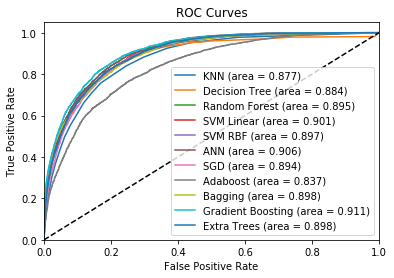

<Figure size 1080x1080 with 0 Axes>

In [144]:
 
# Plot of a ROC curve for a specific class
plt.figure()

#plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)

plt.plot(fpr_knn, tpr_knn, label='KNN (area = %0.3f)' % roc_auc_knn)
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (area = %0.3f)' % roc_auc_dt)
plt.plot(fpr_rf, tpr_rf, label='Random Forest (area = %0.3f)' % roc_auc_rf)
plt.plot(fpr_lsvc, tpr_lsvc, label='SVM Linear (area = %0.3f)' % roc_auc_lsvc)
plt.plot(fpr_rbf, tpr_rbf, label='SVM RBF (area = %0.3f)' % roc_auc_rbf)
plt.plot(fpr_nn, tpr_nn, label='ANN (area = %0.3f)' % roc_auc_nn)
plt.plot(fpr_sgd, tpr_sgd, label='SGD (area = %0.3f)' % roc_auc_sgd)
plt.plot(fpr_bdt, tpr_bdt, label='Adaboost (area = %0.3f)' % roc_auc_bdt)
plt.plot(fpr_bag, tpr_bag, label='Bagging (area = %0.3f)' % roc_auc_bag)
plt.plot(fpr_gbc, tpr_gbc, label='Gradient Boosting (area = %0.3f)' % roc_auc_gbc)
plt.plot(fpr_xdt, tpr_xdt, label='Extra Trees (area = %0.3f)' % roc_auc_xdt)
#plt.plot(fpr_stack, tpr_stack, label='Stacking (area = %0.3f)' % roc_auc_stack)

    
plt.plot([0, 1], [0, 1], 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="best")
plt.figure(figsize=(15,15))
plt.show()

The ROC curves are quite close together (except for the AdaBoost, which is noticeably below) but it appears Gradient Boosting is the best one.  Let's look at accuracy, precision, recall, ROC AUC, and F1 score for each of the models as tweaked for best perfomance:

In [138]:
metrics_data = {'Model': ['KNN',
                          'Decision Tree',
                          'Random Forest',
                          'SVM Linear',
                          'SVM RBF',
                          'ANN',
                          'SGD',
                          'Adaboost',
                          'Bagging',
                          'Gradient Boosting',
                          'Extra Trees',
                          'Stacking'],
    'Accuracy': [accuracy_score(target_test, target_predicted_knn), 
                 accuracy_score(target_test, target_predicted_dt),
                 accuracy_score(target_test, target_predicted_rf),
                 accuracy_score(target_test, predicted_linsvm),
                 accuracy_score(target_test, predicted_rbf),
                 accuracy_score(target_test, predicted_NN),
                 accuracy_score(target_test, predicted_sgd),
                 accuracy_score(target_test, predicted_bdt),
                 accuracy_score(target_test, predicted_bag),
                 accuracy_score(target_test, predicted_GBC),
                 accuracy_score(target_test, predicted_xdt),
                 accuracy_score(target_test, predicted_stack3)], 
    'Precision': [precision_score(target_test, target_predicted_knn),
                  precision_score(target_test, target_predicted_dt),
                  precision_score(target_test, target_predicted_rf),
                  precision_score(target_test, predicted_linsvm),
                  precision_score(target_test, predicted_rbf),
                  precision_score(target_test, predicted_NN),
                  precision_score(target_test, predicted_sgd),
                  precision_score(target_test, predicted_bdt),
                  precision_score(target_test, predicted_bag),
                  precision_score(target_test, predicted_GBC),
                  precision_score(target_test, predicted_xdt),
                  precision_score(target_test, predicted_stack3)], 
        'Recall': [recall_score(target_test, target_predicted_knn), 
                   recall_score(target_test, target_predicted_dt),
                   recall_score(target_test, target_predicted_rf),
                   recall_score(target_test, predicted_linsvm),
                   recall_score(target_test, predicted_rbf),
                   recall_score(target_test, predicted_NN),
                   recall_score(target_test, predicted_sgd),
                   recall_score(target_test, predicted_bdt),
                   recall_score(target_test, predicted_bag),
                   recall_score(target_test, predicted_GBC),
                   recall_score(target_test, predicted_xdt),
                   recall_score(target_test, predicted_stack3)], 
     'F1 Score': [f1_score(target_test, target_predicted_knn), 
                  f1_score(target_test, target_predicted_dt),
                  f1_score(target_test, target_predicted_rf),
                  f1_score(target_test, predicted_linsvm),
                  f1_score(target_test, predicted_rbf),
                  f1_score(target_test, predicted_NN),
                  f1_score(target_test, predicted_sgd),
                  f1_score(target_test, predicted_bdt),
                  f1_score(target_test, predicted_bag),
                  f1_score(target_test, predicted_GBC),
                  f1_score(target_test, predicted_xdt),
                  f1_score(target_test, predicted_stack3)],
               'ROC AUC':  [roc_auc_knn,
                            roc_auc_dt,
                            roc_auc_rf,
                            roc_auc_lsvc,
                            roc_auc_rbf,
                            roc_auc_nn,
                            roc_auc_sgd, 
                            roc_auc_bdt,
                            roc_auc_bag,
                            roc_auc_gbc,
                            roc_auc_xdt, 'N/A']}
            #                roc_auc_stack]}

model_metrics = pd.DataFrame(data=metrics_data)
model_metrics = model_metrics.set_index('Model')
pd.options.display.max_rows = 12
model_metrics


,Accuracy,Precision,Recall,F1 Score,ROC AUC
Model,,,,,
KNN,0.830943,0.695064,0.555676,0.617603,0.876791
Decision Tree,0.841965,0.697250,0.630541,0.662220,0.883526
Random Forest,0.844090,0.717224,0.603243,0.655314,0.895084
SVM Linear,0.847875,0.727920,0.608108,0.662642,0.900654
SVM RBF,0.842762,0.725763,0.578649,0.643910,0.896814
ANN,0.849070,0.740641,0.593514,0.658965,0.906096
SGD,0.840239,0.735102,0.546757,0.627092,0.893962
Adaboost,0.811155,0.629933,0.560811,0.593366,0.837436
Bagging,0.848274,0.762913,0.554865,0.642466,0.897686


The models overall had very similiar performance with no one model a clear standout from the others.  Though incomes greater than 50,000 were the target variable, it wasn't clear from the problem statement whether that was truly more important than predicting incomes under 50,000.  Overall accuracies were within a few percentage points of each other.  Precision and recall show more variation, with precision varying between 62.9% and 77.9% and recall varying between 54.7% and 63.1%.   If overall accuracy is desired, gradient boost and stacking have a slight edge over the others.  If precision is most important (that is, the smallest number of false positives compared to the true positives), stacking is best, followed closely by bagging.  If recall is desired (that is, minimize false negatives compared to the true positives) than decision tree is best, followed by gradient boosting.  Stacking and gradient boost had the best F1 scores.  Gradient boosting had the best AUC.  Per previous results, none of the cross validation results showed overfitting.

On the whole, it appears that the third stack is the best model, followed by gradient boosting. It's not surprising that the gradient boost is part of the best performing (third) stack.